# HUMAN RESOURCES DATASET
The project is based on a Kaggle competition ''https://www.kaggle.com/rhuebner/human-resources-data-set'' where it has been taken into account a dataset in .csv (*HRDataset_v13.csv*) which revolves around a fictitious company, called Dental Magic, for which is given data such as names, DOBs, age, gender, marital status, date of hire, reasons for termination, department, whether they are active or terminated, position title, pay rate, manager name, and performance score. 

These information, that will be explained in detail later, are used for determining a series of characteristics of the company. In particular, it is in our interest to answer a series of questions asked by the owner of the dataset: Dr. Rich Huebner.

The open-question for the project are:
* Is there any relationship between who a person works for and their performance score?
* What is the overall diversity profile of the organization?
* What are our best recruiting sources if we want to ensure a diverse organization?
* Can we predict who is going to terminate and who isn't? What level of accuracy can we achieve on this?
* Are there areas of the company where pay is not equitable?

## SETTINGS

In [1]:
import warnings
warnings.filterwarnings('ignore') # uncomment this line to suppress warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

# INTRODUCTION

Before starting the development of our project is necessary to comment a little what we're are going to perform. The very forst thing that it will be done is to load our specific dataset.

We will provide a brief description of the first problems occurred.

In [2]:
df = pd.read_csv('hr_dataset.csv')
df

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,1/15/2019,0.0
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,1/17/2019,0.0
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,1/18/2019,0.0
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0,NaN,NaN
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,1/15/2019,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
399,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As we can see, the dataset contains a lot of NaNs. These are empty rows which we believe have been added by the owner of the dataset for future updates. Practically, in fact, we have to deal with a very huge list of employees that have worked (or they still work) for this fictional company. 

We'll attach here below the entire list of attributes included within the DataFrame, with the respective brief description of what they mean and which DataType they represent:

![](dictionary.png)

Since the presence of the NaNs we need to perform our first (of many times) data cleaning. It is important that, along the development of our project, we will clean (as well as slice and dice) our data in order to perform the most correct analysis. These of course will be the basis for answering at its best to the questions formulated by Dr. Huebner.

In the specific, here we've just dropped all the rows which don't include any name at the attribute 'Employee_Name': it's obvious to say that these rows are empty for all the attributes and therefore they don't represent any employee at all. If left inside our DataFrame the analysis might be (if not for sure) affected by the NaNs, thus altering the final results.

In [3]:
df2 = df.dropna(subset = ['Employee_Name'])
df2

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,1/15/2019,0.0
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,1/17/2019,0.0
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,1/18/2019,0.0
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0,NaN,NaN
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,1/15/2019,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,"Daniele, Ann",1.411071e+09,1.0,1.0,0.0,3.0,3.0,3.0,0.0,54.10,...,IT/IS,Peter Monroe,7.0,Vendor Referral,Fully Meets,1.55,5.0,8.0,2/12/2019,0.0
306,"Lajiri, Jyoti",1.108028e+09,1.0,1.0,1.0,3.0,3.0,3.0,0.0,56.20,...,IT/IS,Peter Monroe,7.0,Employee Referral,Fully Meets,4.46,5.0,6.0,1/7/2019,0.0
307,"Semizoglou, Jeremiah",9.040136e+08,1.0,1.0,1.0,2.0,3.0,3.0,0.0,53.80,...,IT/IS,Peter Monroe,7.0,On-campus Recruiting,Fully Meets,3.27,4.0,5.0,1/14/2019,0.0
308,"South, Joe",1.308061e+09,0.0,0.0,1.0,1.0,3.0,3.0,0.0,53.00,...,IT/IS,Peter Monroe,7.0,Employee Referral,Fully Meets,5.00,3.0,4.0,1/2/2019,0.0


From an intial database of 401 rows we reached an actual size of 310 employees, which include previous, current and future  employees. However, a first observation must be pointed out: in order to perform a proper analysis we need to drop out all those employees that are going to work in the future.

* NOTE: an error in the dataset has been observed: according to the piece of code here below, all the future workers have already a performance score although they haven't worked yet at all. This is conceptually wrong regardless the fact that future workers are included or not in our analysis. In order to solve this doubt we've contacted Dr.Huebner himself through Linkedin and he thank us for the correction. The dataset is fictional and produced for teaching purposes, so he hasn't realized that he made such a mistake. He personally suggested to NOT convert these workers as active workers and treat them as future workers instead. Since we won't need future workers in our anaysis, we've dropped them.

In [4]:
print(df2['EmploymentStatus'].unique()) # we can see what are the labels for the employment status

df2[df2['EmploymentStatus'] == 'Future Start'] #the future start have already a perfomance score ('PerfScoreID'),
                                               #these rows must be dropped

['Active' 'Terminated for Cause' 'Voluntarily Terminated' 'Future Start'
 'Leave of Absence']


,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30
27,"McKinzie, Jac",1.209049e+09,1.0,1.0,1.0,2.0,6.0,3.0,0.0,55.00,...,Sales,Lynn Daneault,21.0,Website Banner Ads,Fully Meets,2.91,4.0,0.0,1/29/2019,0.0
105,"Clukey, Elijian",1.407069e+09,1.0,1.0,1.0,2.0,5.0,4.0,0.0,24.75,...,Production,Brannon Miller,12.0,Employee Referral,Exceeds,1.97,4.0,0.0,2/28/2019,0.0
160,"Saar-Beckles, Melinda",1.410071e+09,0.0,0.0,0.0,2.0,5.0,2.0,1.0,20.00,...,Production,Kelley Spirea,18.0,Diversity Job Fair,Needs Improvement,1.12,4.0,0.0,2/18/2019,0.0
196,"Crimmings, Jean",1.311063e+09,0.0,0.0,0.0,2.0,5.0,3.0,0.0,19.75,...,Production,Michael Albert,22.0,Newspager/Magazine,Fully Meets,4.12,5.0,0.0,1/28/2019,0.0
208,"Von Massenbach, Anna",1.106026e+09,0.0,0.0,0.0,2.0,5.0,3.0,0.0,20.00,...,Production,Michael Albert,22.0,Newspager/Magazine,Fully Meets,3.21,3.0,0.0,1/29/2019,0.0
244,"Hunts, Julissa",1.106026e+09,0.0,0.0,0.0,2.0,5.0,3.0,0.0,25.00,...,Production,Elijiah Gray,16.0,Vendor Referral,Fully Meets,2.92,5.0,0.0,1/18/2019,0.0
249,"Beak, Kimberly",1.303054e+09,1.0,1.0,0.0,2.0,5.0,4.0,0.0,27.00,...,Production,Kelley Spirea,18.0,Employee Referral,Exceeds,2.70,3.0,0.0,1/14/2019,0.0
277,"Hutter, Rosalie",1.103025e+09,0.0,3.0,0.0,2.0,5.0,3.0,0.0,28.00,...,Production,Webster Butler,NaN,Other,Fully Meets,2.63,3.0,0.0,2/14/2019,0.0
278,"Manchester, Robyn",1.110030e+09,1.0,1.0,0.0,2.0,5.0,3.0,0.0,23.00,...,Production,Webster Butler,NaN,Vendor Referral,Fully Meets,5.00,3.0,0.0,1/21/2019,0.0
302,"Carr, Claudia N",1.010022e+09,0.0,0.0,0.0,2.0,3.0,3.0,0.0,61.30,...,IT/IS,Simon Roup,4.0,Vendor Referral,Fully Meets,5.00,5.0,6.0,2/18/2019,0.0


In [5]:
df2 = df2[(df2['EmploymentStatus'] != 'Future Start')] #workers dropped

print(df2['EmploymentStatus'].unique())
print()
print('The remaining previous and current employees to consider in the first analysis are {}'.format(df2.shape[0]))

['Active' 'Terminated for Cause' 'Voluntarily Terminated'
 'Leave of Absence']

The remaining previous and current employees to consider in the first analysis are 299


The code here below is useful for further considerations. For the moment let's just consider how many workers per manager we have by simply counting how many times appear a specific Manager name in the dataset. Each count then is put inside in a new attribute called 'NumberofEmployees': for each row according to the manager name detected,is registered the count value. Altough is not the best graphically intuitive representation, it's the better solution for some descriptive graphs.

In [6]:
df2['NumberofEmployees'] = df2.groupby('ManagerName')['ManagerName'].transform('count')

From this moment on, we'll procede to answer each and every question in order, giving an exhaustive description of the steps performed for each problem.

# 1) Is there any relationship between who a person works for and their performance score?

We finally reached the first question to solve. The goal here is to detect if any correlation is visible between the performance scores of the employees and the respective Manager for who he/she works. 

The first step is to understand which attributes might comes in hand. After a little analysis inside the dataset, is evident that we'll need to perform a descriptive analysis with the attributes 'ManagerName','PerformanceScore' and its respective ID ('PerfScoreID').

In [7]:
print(df2['ManagerName'].unique()) #list of the managers in the dataset

manager_name = np.unique(df2['ManagerName'], return_counts=True)[0]

['Brandon R. LeBlanc' 'John Smith' 'Lynn Daneault' 'Brian Champaigne'
 'Jennifer Zamora' 'Janet King' 'Simon Roup' 'Eric Dougall' 'Peter Monroe'
 'Board of Directors' 'Amy Dunn' 'Brannon Miller' 'David Stanley'
 'Elijiah Gray' 'Kelley Spirea' 'Ketsia Liebig' 'Kissy Sullivan'
 'Michael Albert' 'Webster Butler' 'Debra Houlihan' 'Alex Sweetwater']


In [8]:
print(sorted(df2['PerfScoreID'].unique())) #the unique values associated with the various performance scores
print()
print(df2['PerformanceScore'].unique()) #the categorical values of the performance scores

[1.0, 2.0, 3.0, 4.0]

['Fully Meets' 'PIP' 'Exceeds' 'Needs Improvement']


'PerfScoreID' attribute quantifies the performances from 1 to 4 associated to the categorical values of the attribute 'PerformanceScore':
* 1.0 = PIP (Performance Improvement Plan)
* 2.0 = Needs Improvement, these workers needs to improve but they're not put under the PIP yet
* 3.0 = Fully Meets, the workers fully meet the expectations of the company. They're considered as threshold level
* 4.0 = Exceeds Expectations, excellent workers who overperform

## First solution

We'll try to see through a countplot how many workers (sub-divided per scores) each manager has. The result should make us understand how many workers and how well they perform under a specific manager. Therefore is also possible to define in theory who is the best and who is the worst manager. Here below the result:

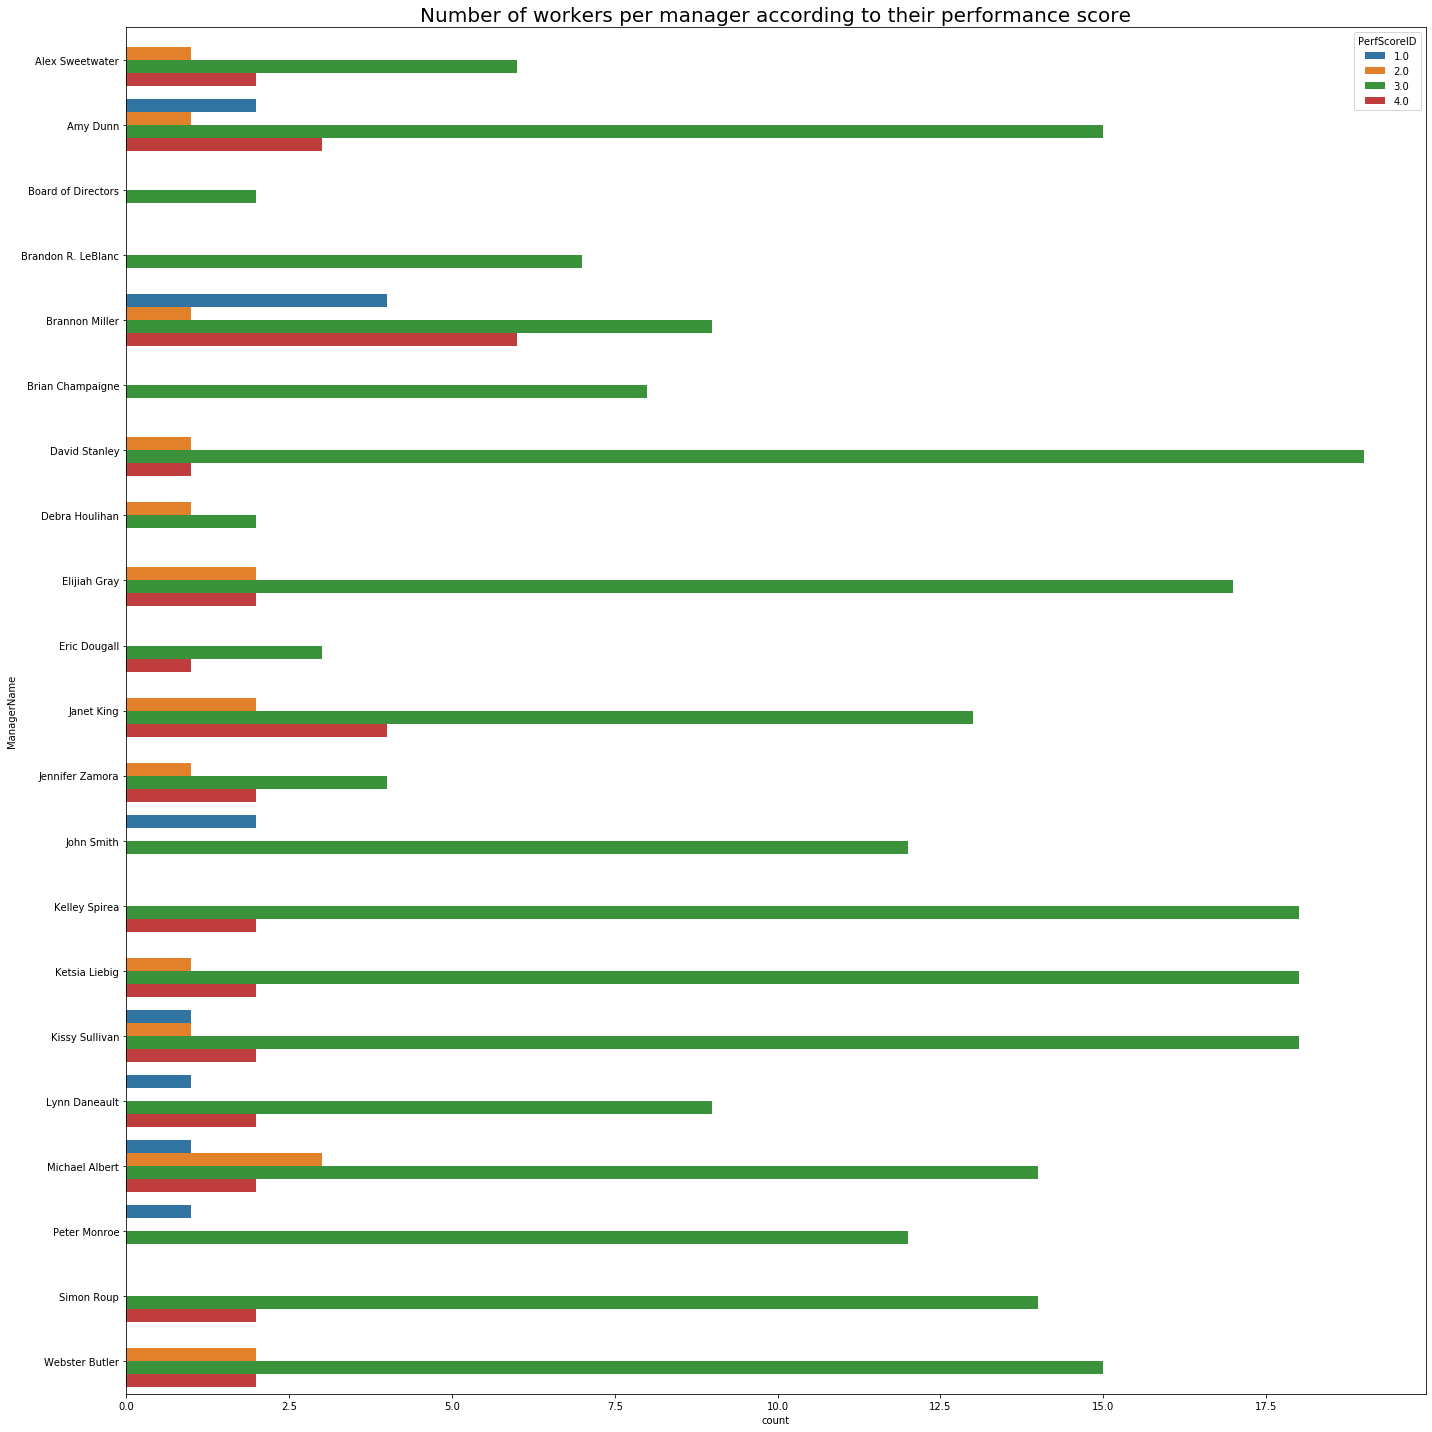

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
sns.countplot(y=df2['ManagerName'], hue=df2['PerfScoreID'], order=manager_name)
plt.title('Number of workers per manager according to their performance score', fontsize = 20)
plt.tight_layout()
plt.show()

The figure above shows us which are the Managers who have an higher number of Employee that satisfy the various performance scores.

* Brannon Miller has the highest number of employee that exceeds the expectations with a 4.0 performance score... but also the highest number of employees who need to go under PIP (1.0 score)

In our opinion however, it is interesting to point out that the number of employees for each manager is different. Therefore saying that David Stanley is the best manager only because he has the highest number of employees with 3.0 it's a little bit oversimplicistic. We have decided to try to get a ManagerScore that is weighted to the number of employees that work for each specific manager.

## Second solution

We need to analyze in depth the previous result. First of all, we create a small dataset here below for clearance and better understanding of the values: we've decided to group according to the 'ManagerName' attribute and then we've calculated the means (which implies that the performances are weighted to the number of workers under each Manager), the variances (for establishing an error interval) and the actual number of employees. This latter data will be useful for having an extra dimension through which trying to understand a potential hidden pattern.

In [10]:
avg_score = df2.groupby(['ManagerName'])['PerfScoreID'].agg(['mean', 'var']).sort_values(by='mean',ascending=False)
avg_score['NumberofEmployees'] = df2.groupby(['ManagerName']).size()
pal = sns.cubehelix_palette(len(avg_score['NumberofEmployees'].unique()),start= 3, rot=-0.5, reverse=True) 

avg_score

,mean,var,NumberofEmployees
ManagerName,,,
Eric Dougall,3.250000,0.250000,4
Jennifer Zamora,3.142857,0.476190,7
Simon Roup,3.125000,0.116667,16
Alex Sweetwater,3.111111,0.361111,9
Janet King,3.105263,0.321637,19
Kelley Spirea,3.100000,0.094737,20
Ketsia Liebig,3.047619,0.147619,21
Brian Champaigne,3.000000,0.000000,8
David Stanley,3.000000,0.100000,21


From the table above we can create a barplot that includes many information together.

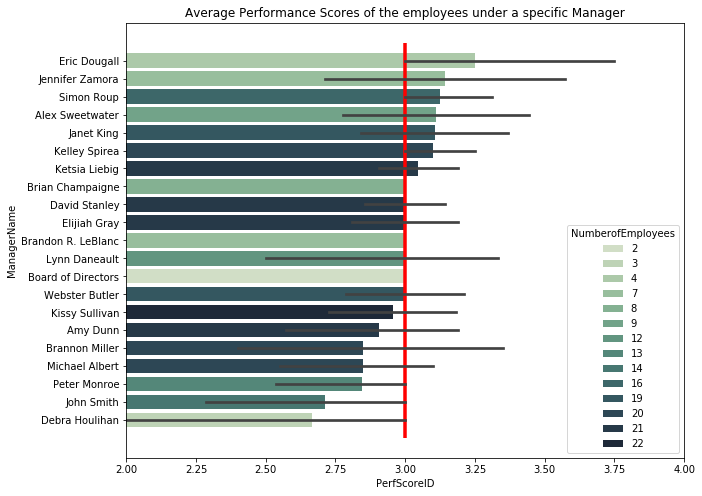

In [11]:
plt.figure(figsize=(10,8))
sns.barplot(y=df2['ManagerName'],estimator=np.mean, x= df2['PerfScoreID'], order = avg_score.index,\
            hue= df2['NumberofEmployees'], dodge=False, palette = np.array(pal[::-1])) 
plt.vlines(3,ymin=-1,ymax=21, color="red", linewidth=3.5)
plt.xlim(2.0,4.0)
plt.title('Average Performance Scores of the employees under a specific Manager')
plt.show()


This graph shows us each manager capabilty according to the number of employees that he/she has to deal with (the darker is the bar, the higher is the number of employees that work for that specific manager). The vertical line shows us a threshold put at the "fully meets expectations" level: those manager who have a score above the threshold have also on average the capability of making the employees fulfill the expectations (if not exceed), those that stay below the threshold needs on average to improve their capability on managing the employees.
According to the number of employees per manager nothing can be said as additional information: it seems that there's no particular patterns that allows us to say that having more employees means also having worse overall performances or viceversa.
In conlusion:
* The best manager according to this reasoning is Eric Dougall, the worst is Debra Houlihan

# 2) What is the overall diversity profile of the organization?

In order to solve this second question some descriptive analysis should be taken into consideration.

But first, let's make some additional data cleaning:

In [12]:
df2['EmploymentStatus'].value_counts()

Active                    182
Voluntarily Terminated     88
Terminated for Cause       15
Leave of Absence           14
Name: EmploymentStatus, dtype: int64

In [13]:
df2['EmpStatusID'].value_counts()

1.0    183
5.0     88
3.0     14
4.0     14
Name: EmpStatusID, dtype: int64

An error has been found in the coherence between 'EmploymentStatus' and 'EmpStatusID' (the employment status relative code): 
* 182 'Active' against 183 1.0
* 15 'Leave of Absence' (those workers who are at home for justified reasons but are still employed by the company) against 14 3.0

* The 2.0 corresponds to 'Future Start' which have been removed before

In [14]:
df3= df2.loc[:,('EmpStatusID','EmploymentStatus')]
dfsel = df3[(df3['EmpStatusID'] == 1.0) & (df3['EmploymentStatus']!='Active')]
dfsel #an error has been found in the coherence between 'EmploymentStatus' and 'EmpStatusID'

,EmpStatusID,EmploymentStatus
3,1.0,Terminated for Cause


We can manage the coherence error among the two attributes trhough different methods: we can ignore it, we can eliminate the row or we can modify the value of one of the two attributes in order to make it coherent with the value of the other attribute.

It's our decision to modify this value in 'EmpStatusID' and change it in the df2.

In [15]:
err_line = df2[(df2['EmpStatusID'] == 1.0) & (df2['EmploymentStatus']!= 'Active')] #the row containing the error
err_line

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,NumberofEmployees
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.5,...,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0,NaN,NaN,7


In [16]:
df2.loc[((df2['EmpStatusID'] == 1.0) &\
         (df2['EmploymentStatus']!= 'Active')),'EmpStatusID'] = 4.0 #the value has been replaced correctly

df2 #check index 3 'Howard Estelle' now has 'EmpStatusID' = 4.0

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,NumberofEmployees
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,1/15/2019,0.0,7
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,1/17/2019,0.0,7
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,1/18/2019,0.0,7
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,4.0,1.0,3.0,0.0,21.50,...,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0,NaN,NaN,7
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,1/15/2019,0.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,"Roehrich, Bianca",1.111030e+09,0.0,0.0,0.0,5.0,3.0,3.0,0.0,58.50,...,Simon Roup,4.0,Vendor Referral,Fully Meets,3.88,3.0,7.0,NaN,NaN,16
305,"Daniele, Ann",1.411071e+09,1.0,1.0,0.0,3.0,3.0,3.0,0.0,54.10,...,Peter Monroe,7.0,Vendor Referral,Fully Meets,1.55,5.0,8.0,2/12/2019,0.0,13
306,"Lajiri, Jyoti",1.108028e+09,1.0,1.0,1.0,3.0,3.0,3.0,0.0,56.20,...,Peter Monroe,7.0,Employee Referral,Fully Meets,4.46,5.0,6.0,1/7/2019,0.0,13
308,"South, Joe",1.308061e+09,0.0,0.0,1.0,1.0,3.0,3.0,0.0,53.00,...,Peter Monroe,7.0,Employee Referral,Fully Meets,5.00,3.0,4.0,1/2/2019,0.0,13


### Starting from this we want to analyize just the active and on leave workers according to diversity features:
* Gender
* Martial Status
* Race

In [17]:
df_workers = df2[(df2['EmploymentStatus'] == 'Active') | (df2['EmploymentStatus'] == 'Leave of Absence')]
df_workers

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,NumberofEmployees
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,1/15/2019,0.0,7
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,1/17/2019,0.0,7
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,1/18/2019,0.0,7
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,1/15/2019,0.0,7
7,"Carter, Michelle",1.403066e+09,0.0,0.0,0.0,1.0,6.0,3.0,0.0,55.00,...,John Smith,17.0,Billboard,Fully Meets,5.00,5.0,0.0,1/21/2019,0.0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,"Boutwell, Bonalyn",1.307060e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,34.95,...,Brandon R. LeBlanc,3.0,Diversity Job Fair,Fully Meets,5.00,4.0,3.0,2/18/2019,0.0,7
305,"Daniele, Ann",1.411071e+09,1.0,1.0,0.0,3.0,3.0,3.0,0.0,54.10,...,Peter Monroe,7.0,Vendor Referral,Fully Meets,1.55,5.0,8.0,2/12/2019,0.0,13
306,"Lajiri, Jyoti",1.108028e+09,1.0,1.0,1.0,3.0,3.0,3.0,0.0,56.20,...,Peter Monroe,7.0,Employee Referral,Fully Meets,4.46,5.0,6.0,1/7/2019,0.0,13
308,"South, Joe",1.308061e+09,0.0,0.0,1.0,1.0,3.0,3.0,0.0,53.00,...,Peter Monroe,7.0,Employee Referral,Fully Meets,5.00,3.0,4.0,1/2/2019,0.0,13


* **Race**

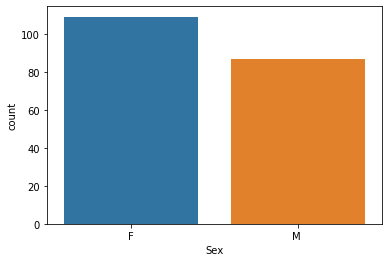

In [18]:
#df_workers.isna().sum() <--- count if any value is missing for the attributes
#df_workers.fillna({'Sex':'Unknown'}) <--- if any

sns.countplot(x="Sex", data=df_workers)
plt.show()

There is a prevalence of females over males among the employees.

* **Martial Status**

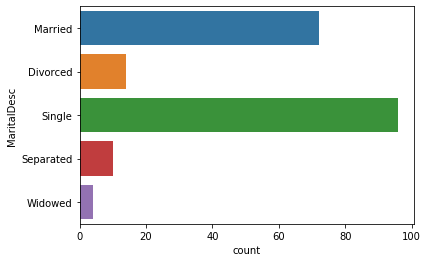

In [19]:
#df_workers.fillna({'MartialDesc':'Unknown'}) <--- if any
sns.countplot(y="MaritalDesc", data=df_workers)
plt.show()

The workers are mainly single or married.

* **Race**

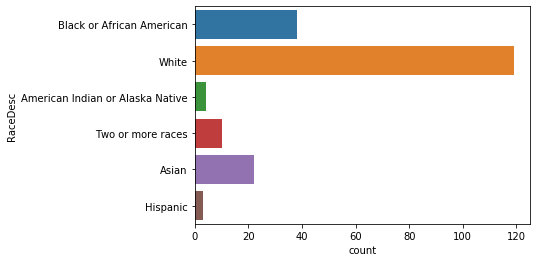

In [20]:
#df_workers.fillna({'RaceDesc':'Unknown'}) <--- if any
sns.countplot(y="RaceDesc", data=df_workers)
plt.show()

In terms of races, the company is based mainly on caucasic people, followed by African American (even though the gap is huge among these two races). For what concerns the other races is possible to say that they belong to the minorities.

* **Diversity Profile**

The summary of the diversities collected inside the company can be expressed as follows:

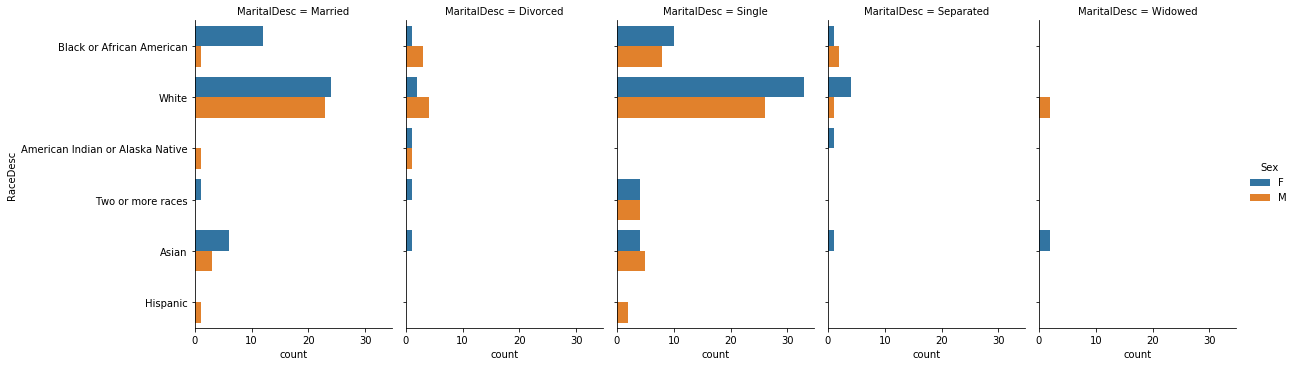

In [21]:
sns.catplot(y='RaceDesc', hue='Sex', col='MaritalDesc', data= df_workers, kind='count', height=5, aspect=.7)
plt.show()

# 3) What are our best recruiting sources if we want to ensure a diverse organization?

According to what we've studied on the previous question we can try to calculate a score based on the diversity of the workers.
First of all we should add an additional column that counts the employees according the 3 studied diversity characteristics joined together.

In [22]:
df_workers['DiversityDesc'] = df_workers["Sex"].str.strip() + "_" +\
                              df_workers["RaceDesc"].str.strip() + "_" + df_workers["MaritalDesc"].str.strip()
#.strip() eliminates all the spaces among the various strings
df_workers['DiversityDesc'].value_counts()

F_White_Single                                  33
M_White_Single                                  26
F_White_Married                                 24
M_White_Married                                 23
F_Black or African American_Married             12
F_Black or African American_Single              10
M_Black or African American_Single               8
F_Asian_Married                                  6
M_Asian_Single                                   5
F_Two or more races_Single                       4
F_White_Separated                                4
M_Two or more races_Single                       4
M_White_Divorced                                 4
F_Asian_Single                                   4
M_Asian_Married                                  3
M_Black or African American_Divorced             3
F_White_Divorced                                 2
M_White_Widowed                                  2
M_Hispanic_Single                                2
M_Black or African American_Sep

From these characteristics we need to model a value that describes the heterogeneity of the various classes in the new attribute 'DiversityDesc' according to each recrutiment source in the 'RecruitmentSource' attribute, as the question asks.

The best tool then for understanding how various is the pool of employees inside a recruitment source (e.g. Female White Divorced + Male Hispanic Married + more and more diverse individuals), and therefore provide a diverse organization, is the ENTROPY. 

As well explained inside the information theory for communications, the entrpoy here shows us a value that moves from 0 to 1 (if we had a binary solution, that is not our case) or from 0 to +infinite if we have multiple solutions. This latter is our case: of course, those recruitment sources that have a value of 0 in our table below means that there is certainty in having a specific employee with specific "diversity characteristics". On the other way round, the higher is the value of entropy, the harder will be the ability to define which employee with "diversity characteristics" is inside the pool of that specific recruitment source. 
Therefore, the recruitment source which has the highest value of entropy is supposed to be the one that guarantees a more diverse organization inside the company.

In [23]:
from scipy.stats import entropy
df_sub = pd.DataFrame(df_workers.groupby('RecruitmentSource')['DiversityDesc']\
                      .agg(lambda x: entropy(x.value_counts(normalize=True))))  #<--- here is calculated our entropy.
                                                                                # The entropy value replace the 'DiversityDesc'
                                                                                # count provided before
df_sub['NumberofEmployees'] = df_workers.groupby(['RecruitmentSource']).size()                                                                                  #     count provided before
df_sub = df_sub.sort_values(by="DiversityDesc", ascending=False)
df_sub.reset_index(inplace=True)


pal = sns.cubehelix_palette(len(df_sub['NumberofEmployees'].unique()),\
                            start= 3, rot=-0.5, reverse=True)                   #used for creating the color palette in the next barplot

df_sub # a simple table for having the interesting results at sight

,RecruitmentSource,DiversityDesc,NumberofEmployees
0,Employee Referral,2.321541,25
1,Diversity Job Fair,2.253858,12
2,MBTA ads,2.204785,13
3,On-campus Recruiting,2.163956,10
4,Website Banner Ads,2.145842,11
5,Pay Per Click - Google,2.099293,17
6,Professional Society,1.956187,17
7,Indeed,1.906155,8
8,Billboard,1.893788,11
9,Monster.com,1.844621,13


The number of employees recruited by each source might affect the entropy value. Let's see if this is real by judging the following barplot.

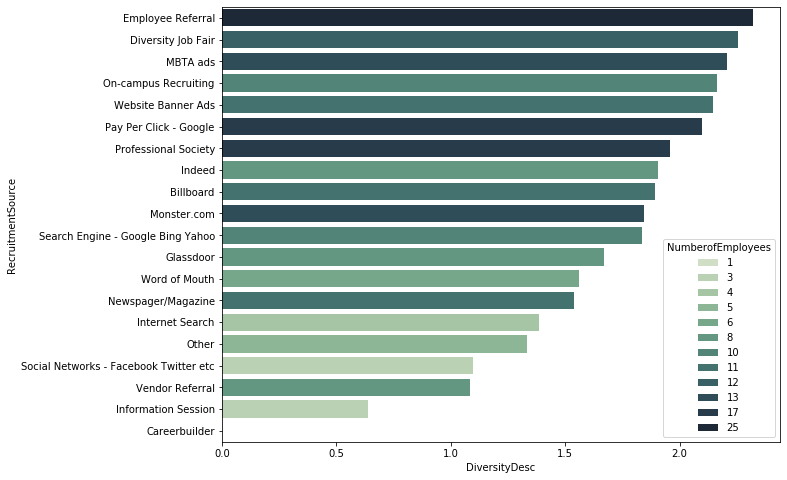

In [24]:
plt.figure(figsize=(10,8))
ax = sns.barplot(x="DiversityDesc", y="RecruitmentSource", data=df_sub,\
                 hue='NumberofEmployees', dodge=False, palette = pal[::-1]) # pal[::-1] for inverting the color scheme from 
                                                                            #lighter to darker.
    
    #we use the command dodge=False for avoiding an additional split of the bars according to the hue. Otherwise each bar split
    #in 12 sub-bars, as the possible values detected in the legend.

The graph above tells:
* Employee Referral seems to be the source of recruitment that includes the most heterogeneous pool of employees.

* **The colors of the bars actually demonstrates in general that, at the increase of the number of employees recruited by a specific source, the value of entropy is higher since more and many diverse individuals are recruited.**

Although the theory tells us that having an higher number within the pool it might increase the entropy, it doesn't represent a certainty: for exapmle, we can have a million of people inside that entropy value, but if they're all similar the value equals to 0 regardless the size of the pool.

# 4) Can we predict who is going to terminate and who isn't?

The forth question finally makes the things more interesting: we finally move from a simple descriptive analysis to the development of a supervised classification model. Like it has been said, the question already gives us what it is necessary to search and classifiy: we need to determine who are the workers that still work for the company and who have left it.

The question itself therefore shows us that our goal is to create/exploit an/more algorithm/s where a classification of a target variable can be performed. In this dataset it is clear that the target variable is the attribute 'Termd', which shows us who have left (1.0) the company and who still works in (0.0).

In [25]:
df2['Termd'].value_counts()  #more individuals are still working in the company

0.0    196
1.0    103
Name: Termd, dtype: int64

As always, before moving inside the development of the actual question we're going to perform some data cleaning.

In [26]:
df2['EmploymentStatus'].isna().value_counts() #checking if any data is missing by mistake

False    299
Name: EmploymentStatus, dtype: int64

Every individual included in the database who not belongs to the label 'Future Start' of the 'EmpolymentStatus' attribute, has been taken into account. There is no NaN included. Please check the numbers: 299 for the employees in 'EmploymentStatus' and 196+103=299 for the target variable.

In [27]:
df_target = df2[df2['EmploymentStatus']!='Future Start'] #we create a specific DataFrame for the specific question
print('The shape of this new DataFrame at the beginning is : {}'.format(df_target.shape))

The shape of this new DataFrame at the beginning is : (299, 36)


* Starting from this DataFrame called **df_target**, we check per each attribute its dtype. The results will allow us to provide additional information regarding the general meaning of the attributes. 

In [28]:
df_target.dtypes

Employee_Name                  object
EmpID                         float64
MarriedID                     float64
MaritalStatusID               float64
GenderID                      float64
EmpStatusID                   float64
DeptID                        float64
PerfScoreID                   float64
FromDiversityJobFairID        float64
PayRate                       float64
Termd                         float64
PositionID                    float64
Position                       object
State                          object
Zip                           float64
DOB                            object
Sex                            object
MaritalDesc                    object
CitizenDesc                    object
HispanicLatino                 object
RaceDesc                       object
DateofHire                     object
DateofTermination              object
TermReason                     object
EmploymentStatus               object
Department                     object
ManagerName 

As we can see, many of the attributes contain a dtype = 'object'. Most of them are in fact attributes which include categorical variables. In particular the first part of the dataset we have dtypes = 'float64', this because most of them are representing the ID-code corresponding to the actual categorical variables of the attributes. 

Without going too much in detail the few things to underline here are:
* for our purposes of classification it will be better to use the attributes which include categorical variables. These latter must be transformed before being feed to the various classfication algorithms. We are going to provide a more precise explanation later.
* many of the variables will be dropped since they represent "doubles" in the meaning: even though they have different dtypes, the ID variables are just a representation in numbers of the corresponding categorical attributes. 
* **the most interesting detail here is that along these attributes we have a series of time-data attributes that are not expressed in the correct format: for example 'DateofHire' or 'DateofTermination' are *object*. Instead, they should be *datetime64*... with this format these attributes will be the base for providing extra informations useful for the classification models. Therefore we are going to store new information about time in new attribute columns**

In [29]:
df_target['DaysLateLast30'].unique() #this attribute could be useful somehow but the only values are 0 or NaN. This implies 
                                     #no meaning for this attribute. It will be dropped. 

array([ 0., nan])

Two new attributes will be added: 'DaysSinceHire' and 'DaysSinceTermd'. These attributes will create a dtype *datetime64* where they count in days how many days have passed since being hired and (in case) since they've ended the contract with the company.
For creating these values we need to consider the date of today as datetime, and transform 'DateofHire' and 'DateofTermination' timestamp format in one that is valid as *datetime64*.

In [30]:
from datetime import datetime

df_target['DaysSinceHire'] = (datetime.now()  - pd.to_datetime(df_target['DateofHire'],infer_datetime_format=True)).dt.days
df_target['DaysSinceTermd'] = (datetime.now()  - pd.to_datetime(df_target['DateofTermination'],infer_datetime_format=True)).dt.days
df_target.fillna({'DaysSinceTermd': 0}, inplace=True) #since some workers still work into the company, they don't have a 
                                                      #termination date. This must be filled counting 0 days from termination.


From the two new attributes by simple calculating the difference we have the number of days worked in the company. These values are stored as 'DaysWorked'. This is one of the new attributes that might tells something more into the classification process.

In [31]:
df_target['DaysWorked'] = df_target['DaysSinceHire'] - df_target['DaysSinceTermd']

We can provide more data. Starting from 'DOB' attribute (which stands for Date of Birth) we can count how many days have past since when a worker born. Through this value we can calculate the maximum age that a worker have at the time is employed in the company (therefore, if an employee terminated the age is counted at the last day of his employment).

Even though this idea at first seems effective, we've noticed that for those timestamps which preceed 01-01-1970 the number of days are counted as negative values. This means that the calculation provide negative days counted that cannot be transformed in age.

In [32]:
df_target['DaysFromBirth'] = (datetime.now()  - pd.to_datetime(df_target['DOB'],infer_datetime_format=True)).dt.days
# day zero at 01-01-1970

df_target['MaxAgeWhenEmployed']= df_target['DaysFromBirth'] - df_target['DaysSinceTermd']

df_target['MaxAgeWhenEmployed'] #some values are negatively counted so, they cannot be used for calculate the age of the workers.

0      11831.0
1      13138.0
2      12280.0
3      10803.0
4      11654.0
        ...   
304    15507.0
305   -11600.0
306    12411.0
308   -16583.0
309    15324.0
Name: MaxAgeWhenEmployed, Length: 299, dtype: float64

We need to proceed in a different way then. We are going to fill the missing 'DateofTermination' with the date of today and then transform the values in *datetime64* format.

In [33]:
df_target['DateofTermination']

0           NaN
1           NaN
2           NaN
3      04/15/15
4           NaN
         ...   
304    11/10/15
305         NaN
306         NaN
308         NaN
309         NaN
Name: DateofTermination, Length: 299, dtype: object

In [34]:
import datetime

today = datetime.date.today()
df_target['DateofTermination']= pd.to_datetime(df_target['DateofTermination'],infer_datetime_format=True)
df_target['DateofTermination'].fillna(today, inplace=True)

df_target[['DateofTermination','DOB']] #DOB is still dtype = object, we need to trasform it as well for calculate
                                       #a delta variation counted in years.

,DateofTermination,DOB
0,2020-04-15,11/24/87
1,2020-04-15,04/26/84
2,2020-04-15,09/01/86
3,2015-04-15 00:00:00,09/16/85
4,2020-04-15,05/19/88
...,...,...
304,2015-11-10 00:00:00,05/27/73
305,2020-04-15,01/18/52
306,2020-04-15,04/23/86
308,2020-04-15,09/09/65


This piece of code here below, is used for transforming 'DOB' format in *datetime64*. However, since the dates below 01-01-1970 are transformed in the current century (i.e. 01-01-2070 or lower) we need to modify the century of these dates in the correct one. The result is as follows:

In [35]:
bir = []
birth= pd.to_datetime(df_target['DOB'])

for date in birth:
    if date > today:
        birth = date.replace(year=date.year - 100)
        bir.append(birth)
    else:
        bir.append(date)

df_target = df_target.reset_index(drop=True)
df_target['DateofBirth'] = pd.DataFrame(bir)

df_target[['DOB', 'DateofBirth']]

,DOB,DateofBirth
0,11/24/87,1987-11-24
1,04/26/84,1984-04-26
2,09/01/86,1986-09-01
3,09/16/85,1985-09-16
4,05/19/88,1988-05-19
...,...,...
294,05/27/73,1973-05-27
295,01/18/52,1952-01-18
296,04/23/86,1986-04-23
297,09/09/65,1965-09-09


We can obtain finally how old are the employees at the time they are/were working inside the company. The values are stored in a new 'MaxAgeWhileEmployed' attribute.

In [36]:
df_target['DateofTermination'] = pd.to_datetime(df_target['DateofTermination'])

df_target['DateofBirth']= pd.to_datetime(df_target['DateofBirth'])

from dateutil.relativedelta import relativedelta
df_target['MaxAgeWhileEmployed'] = [relativedelta(a, b).years for a, b in\
                                    zip(df_target['DateofTermination'], df_target['DateofBirth'])]

df_target[['DateofBirth', 'DateofTermination', 'MaxAgeWhileEmployed']]


,DateofBirth,DateofTermination,MaxAgeWhileEmployed
0,1987-11-24,2020-04-15,32
1,1984-04-26,2020-04-15,35
2,1986-09-01,2020-04-15,33
3,1985-09-16,2015-04-15,29
4,1988-05-19,2020-04-15,31
...,...,...,...
294,1973-05-27,2015-11-10,42
295,1952-01-18,2020-04-15,68
296,1986-04-23,2020-04-15,33
297,1965-09-09,2020-04-15,54


### Once the df_target has been cleaned and added of extra information, we can finally start our classification process.

The first thing to do is to drop many of the attributes in the DataFrame:
* We will drop all the ID attributes: these are numerical data that however will be considered by the classification models as ordinal variables. THIS IS WRONG! The ID codes translate categorical attibutes, if they would be treated as ordinal the intrinsec meaning is that the variables have an order in importance (e.g. males comes after females in importance, or married comes after singles in importance) but this is not true at all. Every variable is indipendent to the other contained in the same attribute.


* We'll keep all the categorcial variables that are interesting for the classification, these will be transformed through the **OneHotEncoder**.


* Attributes such as the target 'Termd' or those which are strictly dependent to it (e.g. 'TermReason','EmploymentStatus','DaysSinceTermd') must be dropped. They are obvious in the meaning: since we need to create a prediction model for the target, predicting by keeping into account the reasons of termination, for example, alters the predictions towards the presence of the values in this attributes. And this is something that we MUST AVOID.

In [37]:
df_target.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'PayRate', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'NumberofEmployees', 'DaysSinceHire', 'DaysSinceTermd', 'DaysWorked',
       'DaysFromBirth', 'MaxAgeWhenEmployed', 'DateofBirth',
       'MaxAgeWhileEmployed'],
      dtype='object')

In [38]:
drop_cols = ['Employee_Name', 'EmpID', 'MarriedID','MaritalStatusID','GenderID','EmpStatusID','DeptID','PerformanceScore',
               'PositionID','Zip','DOB','HispanicLatino', 'DateofHire','DateofTermination','TermReason','EmploymentStatus',
             'ManagerID', 'LastPerformanceReview_Date', 'DaysLateLast30','DaysSinceHire','DaysSinceTermd','DaysFromBirth',
             'MaxAgeWhenEmployed', 'DateofBirth', 'Termd', 'FromDiversityJobFairID','NumberofEmployees']

df_target2 = df_target.drop(drop_cols, axis=1)
df_target2

,PerfScoreID,PayRate,Position,State,Sex,MaritalDesc,CitizenDesc,RaceDesc,Department,ManagerName,RecruitmentSource,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysWorked,MaxAgeWhileEmployed
0,3.0,28.50,Accountant I,MA,F,Married,US Citizen,Black or African American,Admin Offices,Brandon R. LeBlanc,Diversity Job Fair,2.04,2.0,6.0,4188.0,32
1,3.0,23.00,Accountant I,MA,M,Divorced,US Citizen,Black or African American,Admin Offices,Brandon R. LeBlanc,Website Banner Ads,5.00,4.0,4.0,2291.0,35
2,3.0,29.00,Accountant I,MA,M,Single,US Citizen,White,Admin Offices,Brandon R. LeBlanc,Internet Search,3.90,5.0,5.0,2025.0,33
3,3.0,21.50,Administrative Assistant,MA,F,Married,US Citizen,White,Admin Offices,Brandon R. LeBlanc,Pay Per Click - Google,3.24,3.0,4.0,58.0,29
4,3.0,16.56,Administrative Assistant,MA,F,Single,US Citizen,White,Admin Offices,Brandon R. LeBlanc,Website Banner Ads,5.00,3.0,5.0,1811.0,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,3.0,58.50,Principal Data Architect,MA,F,Single,US Citizen,White,IT/IS,Simon Roup,Vendor Referral,3.88,3.0,7.0,309.0,42
295,3.0,54.10,Sr. Network Engineer,CT,F,Married,US Citizen,White,IT/IS,Peter Monroe,Vendor Referral,1.55,5.0,8.0,1983.0,68
296,3.0,56.20,Sr. Network Engineer,MA,M,Married,US Citizen,White,IT/IS,Peter Monroe,Employee Referral,4.46,5.0,6.0,1983.0,33
297,3.0,53.00,Sr. Network Engineer,CT,M,Single,US Citizen,White,IT/IS,Peter Monroe,Employee Referral,5.00,3.0,4.0,1983.0,54


Only 16 attributes remain inside the DataFrame. We need, as introduced before, to transform the categorical features through the OneHotEncoder strategy. This latter turns an attribute in a series of attributes with binary solutions corresponding per each column to the boolean predicate of being a particular attribure categorical value. 

In [39]:
categorical = ['Position','State','Sex','MaritalDesc','CitizenDesc','RaceDesc','Department','ManagerName','RecruitmentSource']
print('The categorical features are: {}'.format(categorical))

The categorical features are: ['Position', 'State', 'Sex', 'MaritalDesc', 'CitizenDesc', 'RaceDesc', 'Department', 'ManagerName', 'RecruitmentSource']


In [40]:
transf_dtype = np.int32
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse = False, dtype = transf_dtype)

preprocessor = ColumnTransformer(transformers = [('cat', categorical_transformer, categorical)],
                    remainder = 'passthrough')


In [41]:
X = df_target2      
y = df_target['Termd'] #target attribute

In [42]:
labels = y.unique()
print('The labels are:')
print(labels) #corresponding to those who have terminated their job or not yet

The labels are:
[0. 1.]


In [43]:
fit= preprocessor.fit(X)
fit

ColumnTransformer(n_jobs=None, remainder='passthrough', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('cat',
                                 OneHotEncoder(categories='auto', drop=None,
                                               dtype=<class 'numpy.int32'>,
                                               handle_unknown='ignore',
                                               sparse=False),
                                 ['Position', 'State', 'Sex', 'MaritalDesc',
                                  'CitizenDesc', 'RaceDesc', 'Department',
                                  'ManagerName', 'RecruitmentSource'])],
                  verbose=False)

In [44]:
X_p = preprocessor.fit_transform(X)
df_p = pd.DataFrame(X_p)
df_p

,0,1,2,3,4,5,6,7,8,9,...,123,124,125,126,127,128,129,130,131,132
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,28.50,2.04,2.0,6.0,4188.0,32.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,3.0,23.00,5.00,4.0,4.0,2291.0,35.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,29.00,3.90,5.0,5.0,2025.0,33.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,21.50,3.24,3.0,4.0,58.0,29.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,3.0,16.56,5.00,3.0,5.0,1811.0,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,3.0,58.50,3.88,3.0,7.0,309.0,42.0
295,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,3.0,54.10,1.55,5.0,8.0,1983.0,68.0
296,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,56.20,4.46,5.0,6.0,1983.0,33.0
297,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,53.00,5.00,3.0,4.0,1983.0,54.0


Once we have the correct and transformed DataFrame, we need to split it in a training and test set in order to make the algorithms learn and apply their classification criteria to the target.

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
X_train,X_test,y_train,y_test = train_test_split(X_p, y, random_state = 42)

The theory provide many models to apply for making a supervised classification. Therefore we've exploited a code taken from ScikitLearn in order to apply at the same time many classification models. Every of these latter will be tuned in their hyperparameters prior to generate the classification. In this way we'll optimize the accuracy (and consequently, the precision and recall) scores obtained by each classification model.

The one that we are going to use are:
* Decision Tree
* Gaussian Naive Bayes
* Linear Perceptron
* Support Vector
* K Nearest Neighbor
* Random Forest
* Adaboost

In [46]:
model_lbls = [
             'dt', 
             'nb', 
             'lp', 
             'svc', 
              'knn',
             'rfc',
             'ada',
            ]

# Set the parameters by cross-validation
tuned_param_dt = [{'max_depth': list(range(1,20))}]
tuned_param_nb = [{'var_smoothing': [10**i for i in range(1,-11, -1)]}]
tuned_param_lp = [{'early_stopping': [True]}]
tuned_param_svc = [{'kernel': ['rbf'], 
                    'gamma': [1e-3, 1e-4],
#                     'C': [1, 10, 100, 1000],
                    'C': [10**i for i in range(0,4)],
                    },
                    {'kernel': ['linear'],
                    'C': [10**i for i in range(0,4)],
                    },
                   ]
tuned_param_knn =[{'n_neighbors': list(range(1,11)),
                   'metric': ['euclidean', 'manhattan', 'chebyshev']}
                 ]
tuned_param_rfc =[{'max_depth': list(range(1,11))}]
tuned_param_ada = [{'learning_rate': [1., 0.1, 0.01, 0.001, 0.0001]}]

models = {
    'dt': {'name': 'Decision Tree       ',
           'estimator': DecisionTreeClassifier(), 
           'param': tuned_param_dt,
          },
    'nb': {'name': 'Gaussian Naive Bayes',
           'estimator': GaussianNB(),
           'param': tuned_param_nb
          },
    'lp': {'name': 'Linear Perceptron   ',
           'estimator': Perceptron(),
           'param': tuned_param_lp,
          },
    'svc':{'name': 'Support Vector      ',
           'estimator': SVC(), 
           'param': tuned_param_svc
          },
    'knn':{'name': 'K Nearest Neighbor  ',
           'estimator': KNeighborsClassifier(),
           'param': tuned_param_knn
          },
    'rfc':{'name': 'Random Forest       ',
           'estimator': RandomForestClassifier(),
           'param': tuned_param_rfc
          }, 
    'ada':{'name': 'Adaboost            ',
           'estimator': AdaBoostClassifier(),
           'param': tuned_param_ada
          },
}

scores = [
    'precision_macro', 
#    'recall_macro', 
    'accuracy',
#    'f1_macro'
]

In [47]:
def print_results(model):
    print("Best parameters set found on train set:")
    print()
    # if best is linear there is no gamma parameter
    print(model.best_params_)
    print()
    print("Grid scores on train set:")
    print()
    means = model.cv_results_['mean_test_score']
    stds = model.cv_results_['std_test_score']
    params = model.cv_results_['params']
    for mean, std, params_tuple in zip(means, stds, params):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params_tuple))
    print()
    print("Detailed classification report for the best parameter set:")
    print()
    print("The model is trained on the full train set.")
    print("The scores are computed on the full test set.")
    print()
    y_true, y_pred = y_test, model.predict(X_test)
    dfdict = {'True': y_true,'Predict':y_pred}  # we added an additional graph in order to show which values are predicted per 
                                                # row and what is the actual value taken from the known target attribute.
    dfloop = pd.DataFrame(dfdict)
    print(dfloop)
    print()
    print(classification_report(y_true, y_pred))
    cm = confusion_matrix(y_true,y_pred, labels = labels)
    print(cm)
#     plot_confusion_matrix(cm)
    print()

In [48]:
results_short = {}

for score in scores:
    print('='*40)
    print("# Tuning hyper-parameters for %s" % score)
    print()

    #'%s_macro' % score ## is a string formatting expression
    # the parameter after % is substituted in the string placeholder %s
    for m in model_lbls:
        print('-'*40)
        print("Trying model {}".format(models[m]['name']))
        clf = GridSearchCV(models[m]['estimator'], models[m]['param'], cv=5,
                           scoring=score, 
                           iid = False, 
                           return_train_score = False,
                           n_jobs = 2, # this allows using multi-cores
                           )
        clf.fit(X_train, y_train)
        print_results(clf)
        results_short[m] = clf.best_score_
    print("Summary of results for {}".format(score))
    print("Estimator")
    for m in results_short.keys():
        print("{}\t - score: {:4.2}%".format(models[m]['name'], results_short[m]))

# Tuning hyper-parameters for precision_macro

----------------------------------------
Trying model Decision Tree       
Best parameters set found on train set:

{'max_depth': 2}

Grid scores on train set:

0.936 (+/-0.072) for {'max_depth': 1}
0.967 (+/-0.060) for {'max_depth': 2}
0.942 (+/-0.095) for {'max_depth': 3}
0.937 (+/-0.121) for {'max_depth': 4}
0.931 (+/-0.113) for {'max_depth': 5}
0.947 (+/-0.066) for {'max_depth': 6}
0.939 (+/-0.082) for {'max_depth': 7}
0.939 (+/-0.070) for {'max_depth': 8}
0.943 (+/-0.120) for {'max_depth': 9}
0.947 (+/-0.103) for {'max_depth': 10}
0.936 (+/-0.086) for {'max_depth': 11}
0.923 (+/-0.138) for {'max_depth': 12}
0.931 (+/-0.113) for {'max_depth': 13}
0.937 (+/-0.121) for {'max_depth': 14}
0.937 (+/-0.110) for {'max_depth': 15}
0.941 (+/-0.097) for {'max_depth': 16}
0.936 (+/-0.114) for {'max_depth': 17}
0.939 (+/-0.083) for {'max_depth': 18}
0.937 (+/-0.114) for {'max_depth': 19}

Detailed classification report for the best parameter set:


Best parameters set found on train set:

{'max_depth': 8}

Grid scores on train set:

0.326 (+/-0.009) for {'max_depth': 1}
0.826 (+/-0.100) for {'max_depth': 2}
0.906 (+/-0.041) for {'max_depth': 3}
0.927 (+/-0.035) for {'max_depth': 4}
0.930 (+/-0.030) for {'max_depth': 5}
0.942 (+/-0.029) for {'max_depth': 6}
0.950 (+/-0.044) for {'max_depth': 7}
0.954 (+/-0.053) for {'max_depth': 8}
0.947 (+/-0.041) for {'max_depth': 9}
0.948 (+/-0.046) for {'max_depth': 10}

Detailed classification report for the best parameter set:

The model is trained on the full train set.
The scores are computed on the full test set.

     True  Predict
281   0.0      0.0
265   1.0      1.0
164   0.0      0.0
9     0.0      0.0
77    0.0      0.0
..    ...      ...
126   0.0      0.0
228   1.0      1.0
283   1.0      1.0
255   1.0      1.0
158   0.0      0.0

[75 rows x 2 columns]

              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94        50
         1.0       0

Best parameters set found on train set:

{'metric': 'manhattan', 'n_neighbors': 7}

Grid scores on train set:

0.933 (+/-0.063) for {'metric': 'euclidean', 'n_neighbors': 1}
0.928 (+/-0.077) for {'metric': 'euclidean', 'n_neighbors': 2}
0.920 (+/-0.067) for {'metric': 'euclidean', 'n_neighbors': 3}
0.911 (+/-0.085) for {'metric': 'euclidean', 'n_neighbors': 4}
0.933 (+/-0.063) for {'metric': 'euclidean', 'n_neighbors': 5}
0.929 (+/-0.065) for {'metric': 'euclidean', 'n_neighbors': 6}
0.938 (+/-0.076) for {'metric': 'euclidean', 'n_neighbors': 7}
0.924 (+/-0.082) for {'metric': 'euclidean', 'n_neighbors': 8}
0.937 (+/-0.059) for {'metric': 'euclidean', 'n_neighbors': 9}
0.938 (+/-0.065) for {'metric': 'euclidean', 'n_neighbors': 10}
0.937 (+/-0.059) for {'metric': 'manhattan', 'n_neighbors': 1}
0.942 (+/-0.067) for {'metric': 'manhattan', 'n_neighbors': 2}
0.928 (+/-0.066) for {'metric': 'manhattan', 'n_neighbors': 3}
0.920 (+/-0.067) for {'metric': 'manhattan', 'n_neighbors': 4}
0.937 

As we can see above from the various classification report and confusion matrixes, The various methods perform overall a good classification prediction comapred to the target. In fact, we already have the values of those who terminated or not. These are used for testing the accuracy (and thus the precision/recall) of the classification algorithms.

As we can see in the summaries:
* For the **precision** score we have:


 * Decision Tree       	 - score: 0.96%
 * Gaussian Naive Bayes	 - score: 0.95%
 * Linear Perceptron   	 - score: 0.85%
 * Support Vector      	 - score: 0.96%
 * K Nearest Neighbor  	 - score: 0.94%
 * Random Forest       	 - score: 0.96%
 * Adaboost            	 - score: 0.96%
 
Except for the Linear perceptron all the other methods manage to guess true positives among the positive
classifications for a rate of 94-96%.

* For the **accuracy** score we have:


 * Decision Tree       	 - score: 0.96%
 * Gaussian Naive Bayes	 - score: 0.94%
 * Linear Perceptron   	 - score:  0.8%
 * Support Vector      	 - score: 0.96%
 * K Nearest Neighbor  	 - score: 0.95%
 * Random Forest       	 - score: 0.93%
 * Adaboost            	 - score: 0.96%
 
Once again, except for the Linear Percetron method all the other manage to predict correctly in around 93-96% of cases. Decision Tree, Support Vector and Adaboost seem to be the best classification methods for our situation.

To conclude the question, it is possible to predict who is going to terminate or not by using these attributes and this algorithms with a very good level of accuracy.

# 5) Are there areas of the company where pay is not equitable?

For the last question we need to rearrange the Dataframe according to the actual exigences. Important to say that this question will be answered by applying sources that come outside the Data Mining lectures.

First step: we consider only the workers that are currently employed within the company for make better considerations.

In [49]:
df_active = df_target[(df_target['EmploymentStatus'] == 'Active') | (df_target['EmploymentStatus'] == 'Leave of Absence')]

drop_cols = ['Employee_Name', 'EmpID', 'MarriedID','MaritalStatusID','GenderID','EmpStatusID','DeptID','PerformanceScore',
               'PositionID','Zip','DOB','HispanicLatino', 'DateofHire','DateofTermination','TermReason','EmploymentStatus',
             'ManagerID', 'LastPerformanceReview_Date', 'DaysLateLast30','DaysSinceHire','DaysSinceTermd','DaysFromBirth',
             'MaxAgeWhenEmployed', 'DateofBirth', 'Termd', 'FromDiversityJobFairID', 'NumberofEmployees']

df_active = df_active.drop(drop_cols, axis=1).reset_index(drop=True)
df_active

,PerfScoreID,PayRate,Position,State,Sex,MaritalDesc,CitizenDesc,RaceDesc,Department,ManagerName,RecruitmentSource,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysWorked,MaxAgeWhileEmployed
0,3.0,28.50,Accountant I,MA,F,Married,US Citizen,Black or African American,Admin Offices,Brandon R. LeBlanc,Diversity Job Fair,2.04,2.0,6.0,4188.0,32
1,3.0,23.00,Accountant I,MA,M,Divorced,US Citizen,Black or African American,Admin Offices,Brandon R. LeBlanc,Website Banner Ads,5.00,4.0,4.0,2291.0,35
2,3.0,29.00,Accountant I,MA,M,Single,US Citizen,White,Admin Offices,Brandon R. LeBlanc,Internet Search,3.90,5.0,5.0,2025.0,33
3,3.0,16.56,Administrative Assistant,MA,F,Single,US Citizen,White,Admin Offices,Brandon R. LeBlanc,Website Banner Ads,5.00,3.0,5.0,1811.0,31
4,3.0,55.00,Area Sales Manager,VT,F,Single,US Citizen,White,Sales,John Smith,Billboard,5.00,5.0,0.0,2067.0,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,3.0,34.95,Sr. Accountant,MA,F,Married,US Citizen,Asian,Admin Offices,Brandon R. LeBlanc,Diversity Job Fair,5.00,4.0,3.0,1885.0,33
192,3.0,54.10,Sr. Network Engineer,CT,F,Married,US Citizen,White,IT/IS,Peter Monroe,Vendor Referral,1.55,5.0,8.0,1983.0,68
193,3.0,56.20,Sr. Network Engineer,MA,M,Married,US Citizen,White,IT/IS,Peter Monroe,Employee Referral,4.46,5.0,6.0,1983.0,33
194,3.0,53.00,Sr. Network Engineer,CT,M,Single,US Citizen,White,IT/IS,Peter Monroe,Employee Referral,5.00,3.0,4.0,1983.0,54


In [50]:
cols = df_active.columns.tolist()
cols = cols[2:] + cols[0:2]
df_active = df_active[cols] #ripositioning of columns as mean of optimization for OneHotEncoder, all the numerical variables have
                            #been placed as last columns of the DataFrame
df_active

,Position,State,Sex,MaritalDesc,CitizenDesc,RaceDesc,Department,ManagerName,RecruitmentSource,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysWorked,MaxAgeWhileEmployed,PerfScoreID,PayRate
0,Accountant I,MA,F,Married,US Citizen,Black or African American,Admin Offices,Brandon R. LeBlanc,Diversity Job Fair,2.04,2.0,6.0,4188.0,32,3.0,28.50
1,Accountant I,MA,M,Divorced,US Citizen,Black or African American,Admin Offices,Brandon R. LeBlanc,Website Banner Ads,5.00,4.0,4.0,2291.0,35,3.0,23.00
2,Accountant I,MA,M,Single,US Citizen,White,Admin Offices,Brandon R. LeBlanc,Internet Search,3.90,5.0,5.0,2025.0,33,3.0,29.00
3,Administrative Assistant,MA,F,Single,US Citizen,White,Admin Offices,Brandon R. LeBlanc,Website Banner Ads,5.00,3.0,5.0,1811.0,31,3.0,16.56
4,Area Sales Manager,VT,F,Single,US Citizen,White,Sales,John Smith,Billboard,5.00,5.0,0.0,2067.0,56,3.0,55.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,Sr. Accountant,MA,F,Married,US Citizen,Asian,Admin Offices,Brandon R. LeBlanc,Diversity Job Fair,5.00,4.0,3.0,1885.0,33,3.0,34.95
192,Sr. Network Engineer,CT,F,Married,US Citizen,White,IT/IS,Peter Monroe,Vendor Referral,1.55,5.0,8.0,1983.0,68,3.0,54.10
193,Sr. Network Engineer,MA,M,Married,US Citizen,White,IT/IS,Peter Monroe,Employee Referral,4.46,5.0,6.0,1983.0,33,3.0,56.20
194,Sr. Network Engineer,CT,M,Single,US Citizen,White,IT/IS,Peter Monroe,Employee Referral,5.00,3.0,4.0,1983.0,54,3.0,53.00


Once managed the correct DataFrame for this question, we need to start to reasoning about how to answer. 
Since the request is to notice if the payrates (expressed in hours) are equitable within each position, we want to evaluate the variance per position in terms of payrates (i.e. 'PayRate' attribute). The higher is the variance, the more various and distant are the payrates of employees respect to the average value per position.

Additionally, we want to take a look also at the number of employees per position since, the lesser, the higher are the probabilty of having an high variance (if they have very different payrates).

In [51]:
df_active_pos = df_active.groupby(['Position'])['PayRate'].agg(['mean','var'])
df_active_pos['NumberofEmployees'] = df_active.groupby(['Position']).size()
df_active_pos.sort_values(by='var', ascending=False, inplace=True)
df_active_pos

,mean,var,NumberofEmployees
Position,,,
Network Engineer,41.525000,100.169167,4
IT Support,34.610000,50.609057,8
Data Analyst,36.933333,29.285667,6
Software Engineer,52.246667,19.418387,6
Database Administrator,37.000000,18.000000,2
Accountant I,26.833333,11.083333,3
Production Technician I,19.108875,8.983504,80
Production Technician II,25.018148,4.250316,27
Production Manager,53.611111,2.111111,9


The values of variance show us that not all the positons have inequitable payrates. Therefore we have decided to analyze in detail only those who exceeds an arbitrary threshold (decided as 4.0). 

For the other positions that don't exceed:
* there is not very inequity among the different wages of workers
* there are positions in which only one worker is employed: it's impossible to compare the payrate with anything else so we cannot discuss about inequality. In particular, these roles are mainly of Directors/Managers, thus is pretty understandable having just one person covering these positions.

In [52]:
df_active_var =  df_active_pos.loc[df_active_pos['var'] > 4.0]
df_active_var.index.unique().tolist() #selected position with potential inequality in payrates

['Network Engineer',
 'IT Support',
 'Data Analyst',
 'Software Engineer',
 'Database Administrator',
 'Accountant I',
 'Production Technician I',
 'Production Technician II']

In [53]:
df_active = df_active[df_active['Position'].isin(df_active_var.index.unique().tolist())].reset_index(drop=True)
df_active

,Position,State,Sex,MaritalDesc,CitizenDesc,RaceDesc,Department,ManagerName,RecruitmentSource,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysWorked,MaxAgeWhileEmployed,PerfScoreID,PayRate
0,Accountant I,MA,F,Married,US Citizen,Black or African American,Admin Offices,Brandon R. LeBlanc,Diversity Job Fair,2.04,2.0,6.0,4188.0,32,3.0,28.50
1,Accountant I,MA,M,Divorced,US Citizen,Black or African American,Admin Offices,Brandon R. LeBlanc,Website Banner Ads,5.00,4.0,4.0,2291.0,35,3.0,23.00
2,Accountant I,MA,M,Single,US Citizen,White,Admin Offices,Brandon R. LeBlanc,Internet Search,3.90,5.0,5.0,2025.0,33,3.0,29.00
3,Database Administrator,MA,F,Single,US Citizen,White,IT/IS,Simon Roup,Glassdoor,4.48,5.0,6.0,1843.0,36,3.0,34.00
4,Database Administrator,MA,F,Married,US Citizen,Asian,IT/IS,Simon Roup,Glassdoor,3.75,3.0,5.0,1927.0,33,3.0,40.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,Software Engineer,MA,F,Single,US Citizen,White,Software Engineering,Alex Sweetwater,Pay Per Click - Google,4.96,4.0,6.0,2347.0,33,3.0,56.00
132,Software Engineer,MA,F,Single,US Citizen,Black or African American,Software Engineering,Alex Sweetwater,Monster.com,3.79,5.0,5.0,3019.0,40,3.0,57.12
133,Software Engineer,MA,F,Single,US Citizen,Asian,Software Engineering,Alex Sweetwater,Search Engine - Google Bing Yahoo,1.53,5.0,4.0,2347.0,32,3.0,55.51
134,Software Engineer,MA,F,Married,US Citizen,White,Software Engineering,Alex Sweetwater,Pay Per Click - Google,1.74,3.0,6.0,2718.0,33,3.0,49.25


Here below we've listed the name of the labels for each categorical variable. We'll need them for substituting the name of the columns after the **OneHotEncoder** will be applied.

In [54]:
labels = []
for col in df_active.iloc[:, 1:9]:
    labels.append(df_active[col].unique()) #list of arrays

flat_label = []
for array in labels:
    for element in array:
        flat_label.append(element) #list of element for each array flattened
        
flat_label 

['MA',
 'TX',
 'CT',
 'F',
 'M ',
 'Married',
 'Divorced',
 'Single',
 'Separated',
 'Widowed',
 'US Citizen',
 'Eligible NonCitizen',
 'Non-Citizen',
 'Black or African American',
 'White',
 'Asian',
 'Two or more races',
 'American Indian or Alaska Native',
 'Hispanic',
 'Admin Offices',
 'IT/IS',
 'Production       ',
 'Software Engineering',
 'Brandon R. LeBlanc',
 'Simon Roup',
 'Eric Dougall',
 'Peter Monroe',
 'Amy Dunn',
 'Brannon Miller',
 'David Stanley',
 'Elijiah Gray',
 'Kelley Spirea',
 'Ketsia Liebig',
 'Kissy Sullivan',
 'Michael Albert',
 'Webster Butler',
 'Alex Sweetwater',
 'Diversity Job Fair',
 'Website Banner Ads',
 'Internet Search',
 'Glassdoor',
 'Employee Referral',
 'Pay Per Click - Google',
 'Vendor Referral',
 'Information Session',
 'Monster.com',
 'MBTA ads',
 'Word of Mouth',
 'Professional Society',
 'Newspager/Magazine',
 'Social Networks - Facebook Twitter etc',
 'On-campus Recruiting',
 'Billboard',
 'Other',
 'Search Engine - Google Bing Yahoo',
 '

In [55]:
position = ['Position']
numerical_variables = ['EngagementSurvey','EmpSatisfaction','SpecialProjectsCount',
                       'DaysWorked','MaxAgeWhileEmployed','PerfScoreID','PayRate']

label_list = flat_label + position + numerical_variables

label_list


['MA',
 'TX',
 'CT',
 'F',
 'M ',
 'Married',
 'Divorced',
 'Single',
 'Separated',
 'Widowed',
 'US Citizen',
 'Eligible NonCitizen',
 'Non-Citizen',
 'Black or African American',
 'White',
 'Asian',
 'Two or more races',
 'American Indian or Alaska Native',
 'Hispanic',
 'Admin Offices',
 'IT/IS',
 'Production       ',
 'Software Engineering',
 'Brandon R. LeBlanc',
 'Simon Roup',
 'Eric Dougall',
 'Peter Monroe',
 'Amy Dunn',
 'Brannon Miller',
 'David Stanley',
 'Elijiah Gray',
 'Kelley Spirea',
 'Ketsia Liebig',
 'Kissy Sullivan',
 'Michael Albert',
 'Webster Butler',
 'Alex Sweetwater',
 'Diversity Job Fair',
 'Website Banner Ads',
 'Internet Search',
 'Glassdoor',
 'Employee Referral',
 'Pay Per Click - Google',
 'Vendor Referral',
 'Information Session',
 'Monster.com',
 'MBTA ads',
 'Word of Mouth',
 'Professional Society',
 'Newspager/Magazine',
 'Social Networks - Facebook Twitter etc',
 'On-campus Recruiting',
 'Billboard',
 'Other',
 'Search Engine - Google Bing Yahoo',
 '

*OneHotEncoder* method is then applied.

In [56]:
categorical = ['State','Sex','MaritalDesc','CitizenDesc','RaceDesc','Department','ManagerName','RecruitmentSource']

categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse = False, dtype = transf_dtype)

preprocessor = ColumnTransformer(transformers = [('cat', categorical_transformer, categorical)],
                    remainder = 'passthrough')

In [57]:
fit2 = preprocessor.fit(df_active)
fit2

ColumnTransformer(n_jobs=None, remainder='passthrough', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('cat',
                                 OneHotEncoder(categories='auto', drop=None,
                                               dtype=<class 'numpy.int32'>,
                                               handle_unknown='ignore',
                                               sparse=False),
                                 ['State', 'Sex', 'MaritalDesc', 'CitizenDesc',
                                  'RaceDesc', 'Department', 'ManagerName',
                                  'RecruitmentSource'])],
                  verbose=False)

In [58]:
df_active_p = preprocessor.fit_transform(df_active)
active_p = pd.DataFrame(df_active_p)
active_p

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0,1,0,1,0,0,1,0,0,0,...,0,0,Accountant I,2.04,2,6,4188,32,3,28.5
1,0,1,0,0,1,1,0,0,0,0,...,1,0,Accountant I,5,4,4,2291,35,3,23
2,0,1,0,0,1,0,0,0,1,0,...,0,0,Accountant I,3.9,5,5,2025,33,3,29
3,0,1,0,1,0,0,0,0,1,0,...,0,0,Database Administrator,4.48,5,6,1843,36,3,34
4,0,1,0,1,0,0,1,0,0,0,...,0,0,Database Administrator,3.75,3,5,1927,33,3,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,0,1,0,1,0,0,0,0,1,0,...,0,0,Software Engineer,4.96,4,6,2347,33,3,56
132,0,1,0,1,0,0,0,0,1,0,...,0,0,Software Engineer,3.79,5,5,3019,40,3,57.12
133,0,1,0,1,0,0,0,0,1,0,...,0,0,Software Engineer,1.53,5,4,2347,32,3,55.51
134,0,1,0,1,0,0,1,0,0,0,...,0,0,Software Engineer,1.74,3,6,2718,33,3,49.25


Since the column names after the OneHotEncoder method are just numbers corresponding to the order of labels found inside each attribute, we need to rename the columns with the 'label_list' that we've obtained just prior to attribute transformation. The order is guaranteed since we haven't sorted the unique values inside each attribute so they follow the same criteria of the OneHotEncoder method.

In [59]:
active_p.columns = label_list
active_p

,MA,TX,CT,F,M,Married,Divorced,Single,Separated,Widowed,...,Search Engine - Google Bing Yahoo,Careerbuilder,Position,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysWorked,MaxAgeWhileEmployed,PerfScoreID,PayRate
0,0,1,0,1,0,0,1,0,0,0,...,0,0,Accountant I,2.04,2,6,4188,32,3,28.5
1,0,1,0,0,1,1,0,0,0,0,...,1,0,Accountant I,5,4,4,2291,35,3,23
2,0,1,0,0,1,0,0,0,1,0,...,0,0,Accountant I,3.9,5,5,2025,33,3,29
3,0,1,0,1,0,0,0,0,1,0,...,0,0,Database Administrator,4.48,5,6,1843,36,3,34
4,0,1,0,1,0,0,1,0,0,0,...,0,0,Database Administrator,3.75,3,5,1927,33,3,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,0,1,0,1,0,0,0,0,1,0,...,0,0,Software Engineer,4.96,4,6,2347,33,3,56
132,0,1,0,1,0,0,0,0,1,0,...,0,0,Software Engineer,3.79,5,5,3019,40,3,57.12
133,0,1,0,1,0,0,0,0,1,0,...,0,0,Software Engineer,1.53,5,4,2347,32,3,55.51
134,0,1,0,1,0,0,1,0,0,0,...,0,0,Software Engineer,1.74,3,6,2718,33,3,49.25


active_p is therefore the DataFrame that we are going to use in order to understand which attributes create a significant correlation inside the Ridge and Lasso Regressions. 

We will consider all the attributes of active_p as indipendent variables of a multiple linear regression with 'PayRate' as unique dependent variable .

# Lasso and Ridge regression for understanding which attributes might affect the payrate (calculated in each position that have a significative variance)

Once the entire dataset to consider is properly cleaned, we can start to apply the two different multiple linear regressions: the Ridge and Lasso regressions. These two are different from the simple multiple linear regression since they have alpha, a regularization penalty paramenter that, according to two different ways of calculating the coefficients of the independent variables (square and module), particularly affect the significance of the various independent variables on our dependent variable target (i.e. the PayRate). In particular the Lasso one tend to "nullify" the presence of not very important independent variables by bringing thier coefficient to zero. 

According to this consideration our purpose will be to create a table for each position, that we've assumed has a significant variance within the payrates of the different employees, and understand which indipendent variables have (positvely or negatively) a correlation with the payrate. Therefore, we'll be able to assume a fairness (or not) in the discrepancy of the various payrate per position.

Regarding the last assumption, it is important to say more. Since we've assumed that these positions show inequialties among the payrates, it is also interesting to understand if these inequalities are based on fairness. Let's make an example: if we notice that the payrates are correlated positively to being White and negatively to being Asian, this inequality is aboslutely not fair (we should say that there is ratial discrimination!). On the other side, if the correlation is based positively on the seniority of the employee, this inequality is justified and understandable.

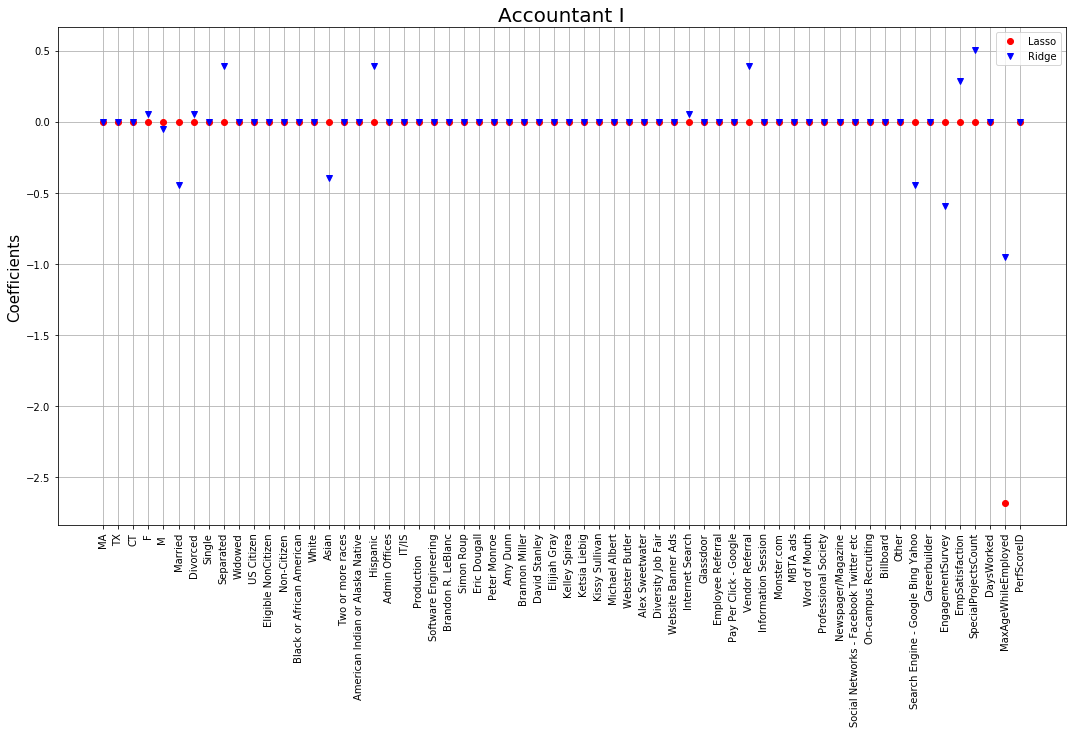

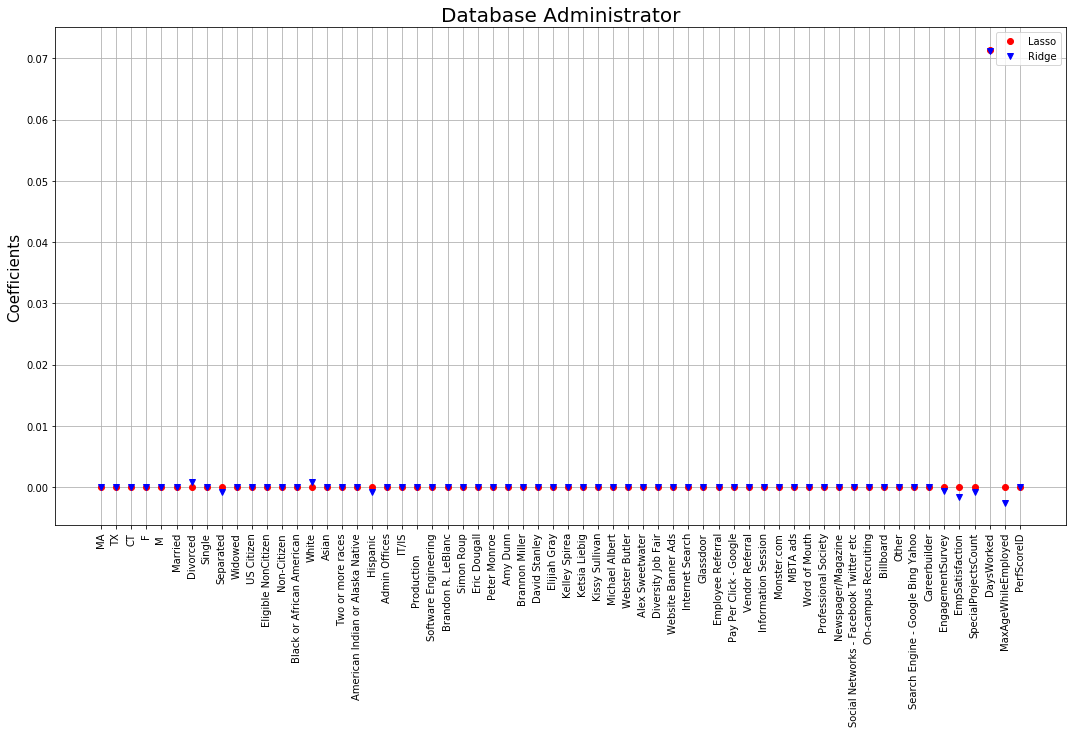

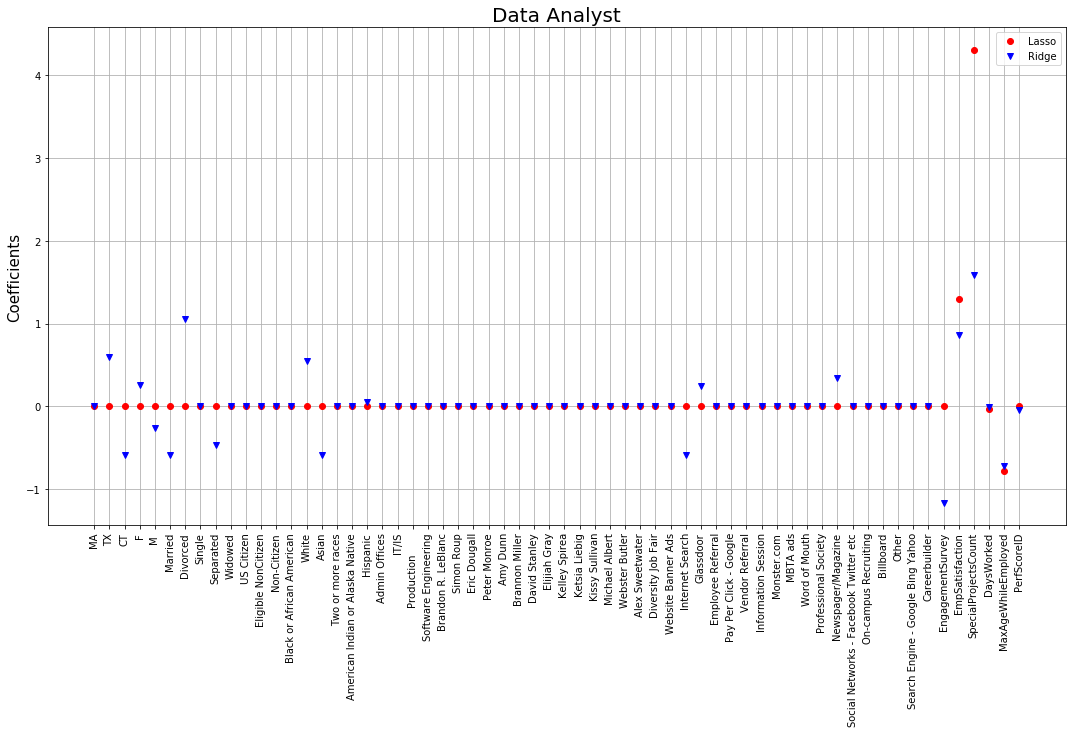

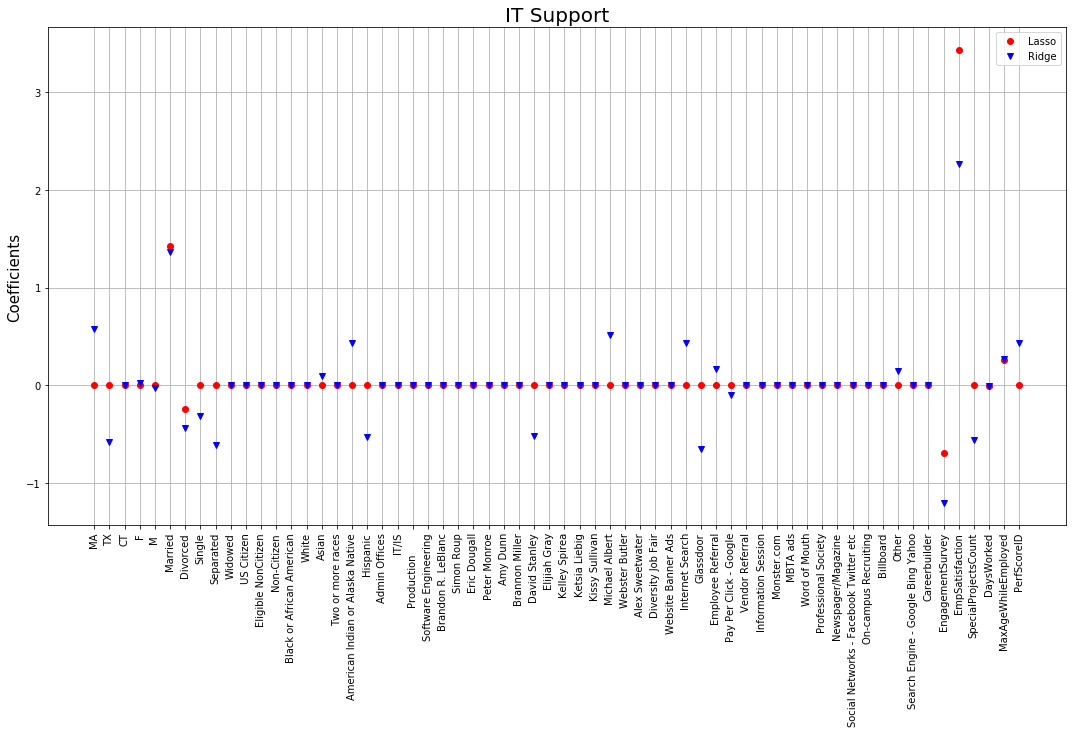

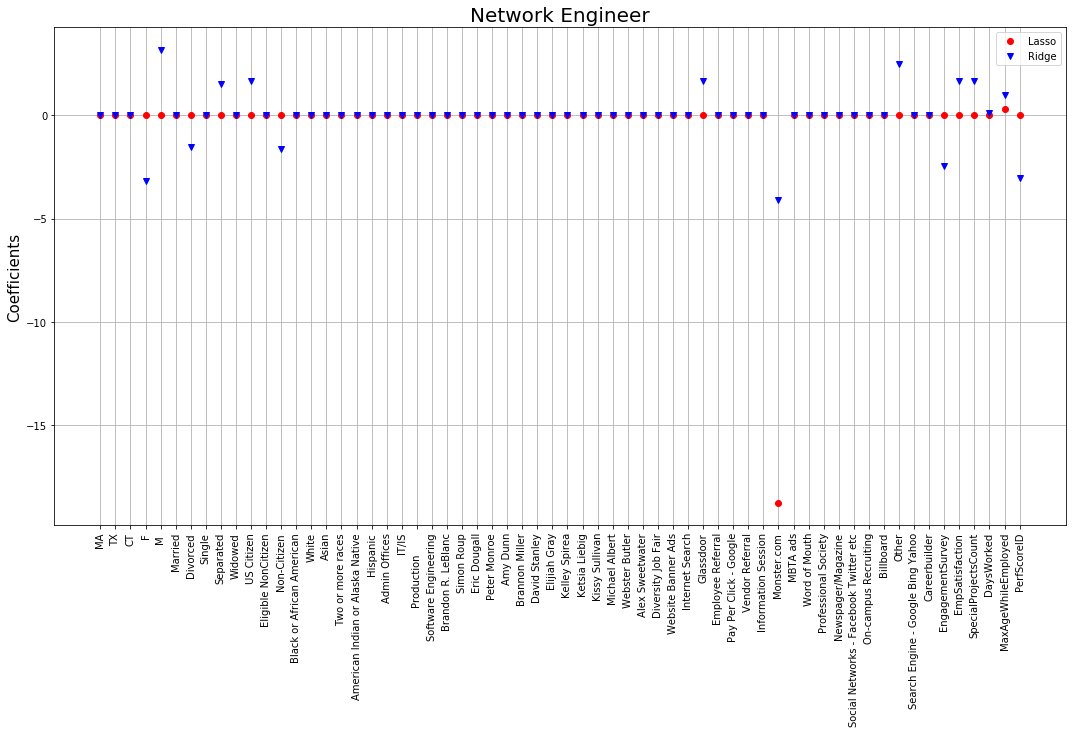

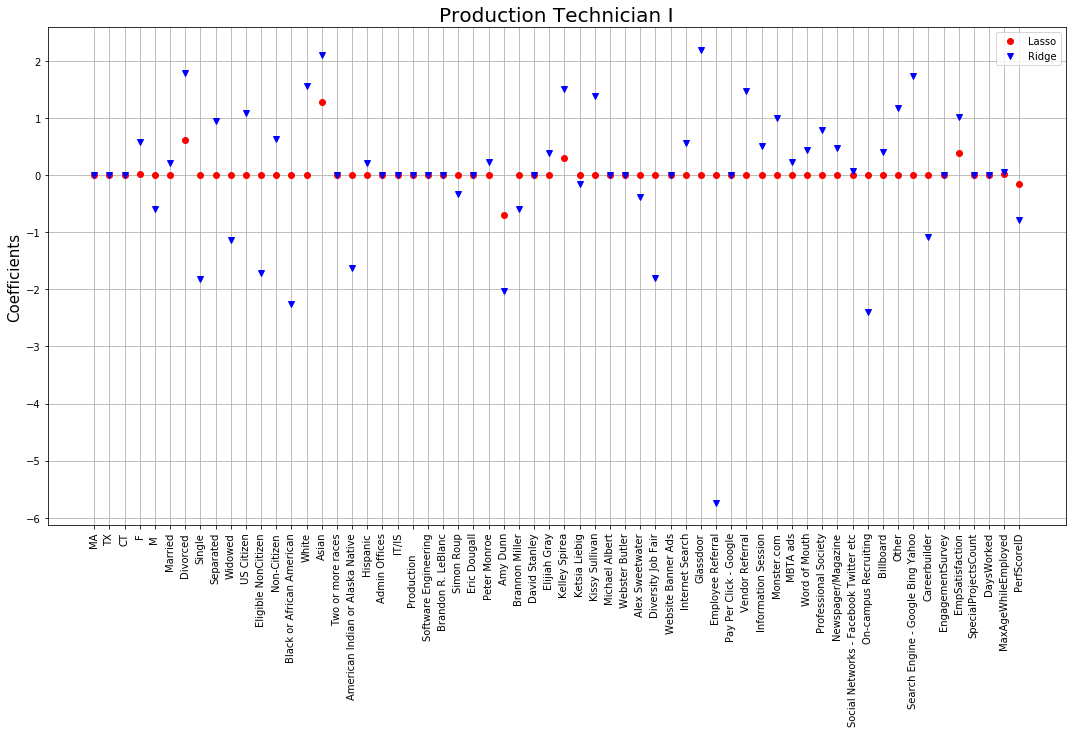

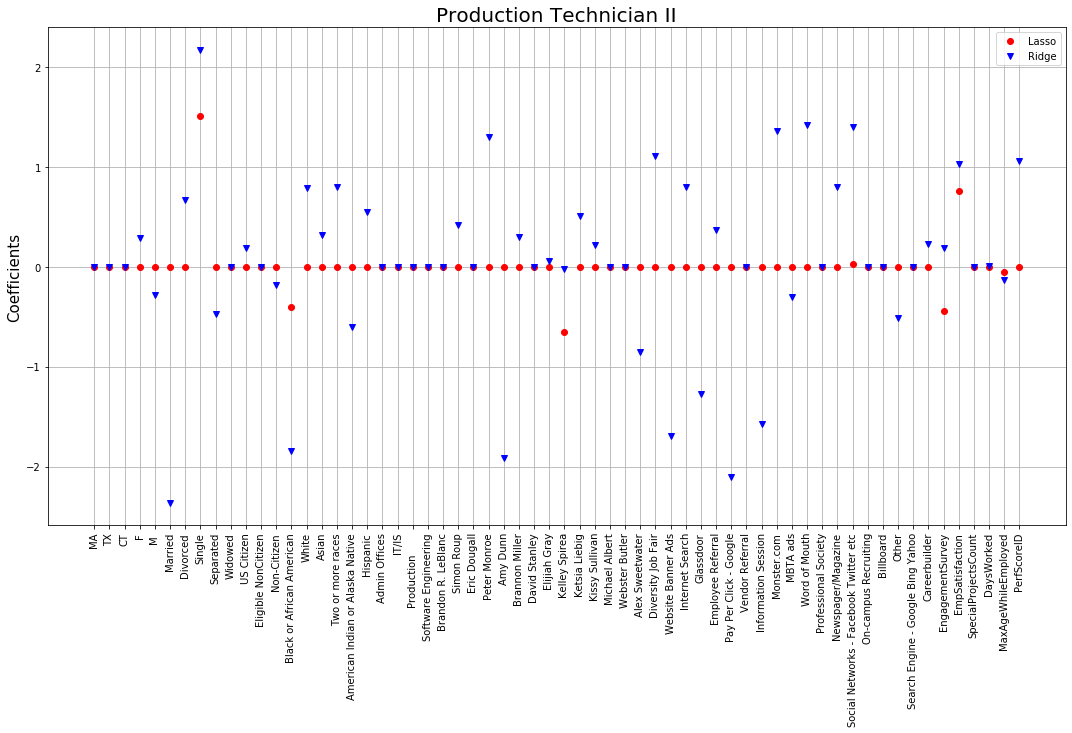

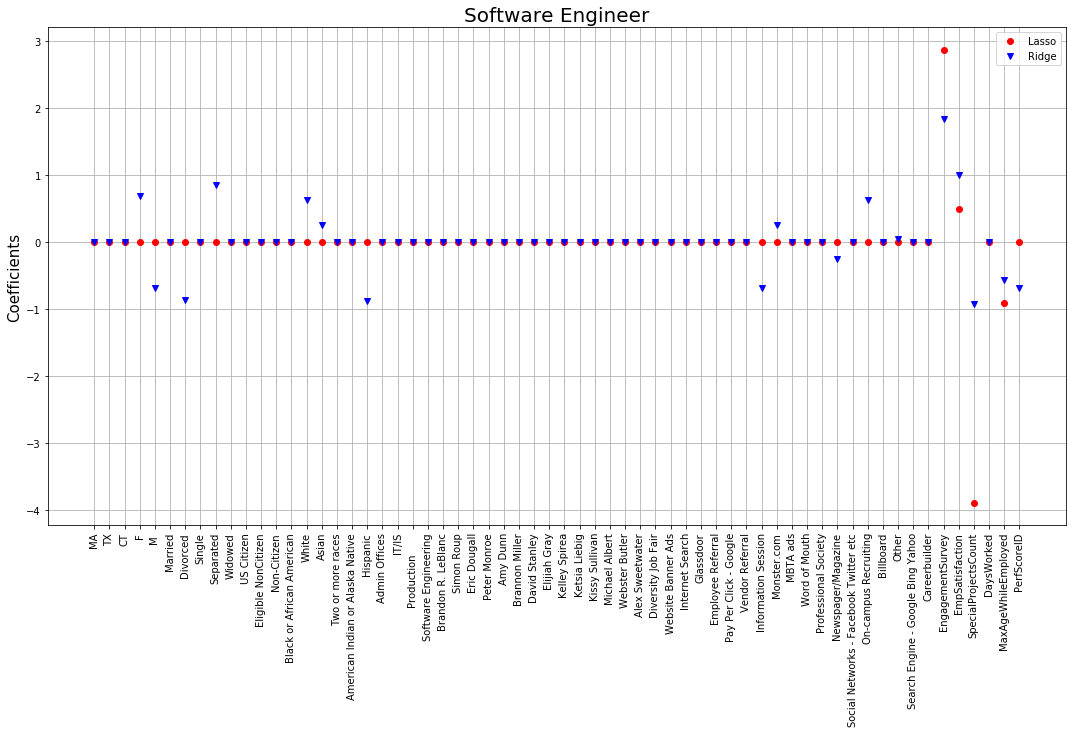

In [60]:
from sklearn.linear_model import Ridge, Lasso
import matplotlib.pyplot as plt


for position in active_p['Position'].unique():

    active_p1 = active_p[active_p['Position']==position]
    active_p1_X = active_p1.drop(['Position','PayRate'], axis = 1)
    position1 = active_p1['PayRate']


    names1 = active_p1_X.columns


    lasso = Lasso(alpha=0.1)
    lasso_coef = lasso.fit(active_p1_X,position1).coef_

    ridge = Ridge(alpha=0.1)
    ridge_coef = ridge.fit(active_p1_X,position1).coef_

    plt.figure(figsize=(15,10))
    plt.plot(range(len(names1)),lasso_coef, 'ro', label='Lasso')
    plt.plot(range(len(names1)),ridge_coef, 'bv', label='Ridge')
    plt.xticks(range(len(names1)),names1, rotation=90)
    plt.ylabel('Coefficients', fontsize = 15)
    plt.tight_layout()
    plt.title(position, fontsize= 20)
    plt.legend()
    plt.grid()
    plt.show()
    


* For ACCOUNTANT I, the two regressions shows us different coefficients: the first assumption to define is that by using the Lasso regression many of the indipendent variables are "nullified" in their importance while the Ridge one tend to underline the presence of multiple indipendent variables that have correlation with the payrate. The Lasso in particular shows that the payrate are negatively correlated by the age of the employees while are working: the older an employee is the lower is its wage.<br> For the Ridge regression instead is interesting to note for example that being an asian worker negatively correlates the payrate whereas being an hispanic one positively increase the PayRate: it's obvious then that a first racial discrimination occurs. The latter observation makes us understand that the inequality expressed inside the ACCOUNTANT I position is not based on a fair criteria. <br>The same can be said for the married employees and those who are divorced (the first get less wage while the latter get an higher payrate), in this case we can say that the inequality is once again unfair. Generally, neither the state of origin, nor the manager for who an employee works nor the recruitment source create a significant correlation with the payrate.


* For the DATABASE ADMINISTRATOR only the number of days worked positively increase the payrate. However the coefficient value is around 0.07 which makes us understand that the variable don't have a significant correlation (if not almost any) to the payrate.


* For the DATA ANALYST, is pretty interesting to note that there are many indipendent variables that are correlated to the payrate and especially in an unfair manner. Take a look to the country of origin: coming from TX means a positive correlatio to the payrate while coming from CT correlates negatively.<br> But many other variables show unfairness: the gender (being a female grants a postive effect on payrates, the opposite by being male), the marital status (see divorced and separated), the race (a White employee means having a postive effect on payrate, the opposite if Asian) are all characteristics that are sustain the inequality on unfair criteria.<br> Interesting to say that the payrate is positively correlated on the satisfaction of the employee and on the number of special project performed by the individual: these are kind of variables that by being the only significative one would generate a fair inequality on the payrates. But since this is not the situation we can say once again that there is unfairness. <br>Lastly, also the age of the employee negatively affect the payrate (the older, the less we obtain which means once again unfairness).


* In the IT SUPPORT happens the same things as in DATA ANALYST: there are lot of variables that are correlated to the payrate. However just few of them are the expression of a fair inequality. <br> For exapmle coming from a specific country creates discriminations, as well as being part of a specific race (Indians vs. Hispanics). <br> Some managers create a correlation on the payrate as well as some recruitment sources: these are more neutral oriented (respect to the fairness of the inqequality) charachteristics, they just tell us that it's better to be under the management of one person or to be hired through a specific source. <br>Lastly, there are also fair correlations to the payrate: being satisfied, increase the payrate for example. 


* For NETWORK ENGINEER there are gender inequalities (positive correlation for males and negative for females) meaning unfairness. A very interesting value is obtained from 'Monster.com': it seems that by being recruited from this source sensitively impacts (with a very negative correlation of over -15 for the Lasso) on the payrates of the employees. Therefore a future worker should avoid the recruitment channel if he/she wants to get a satisfying payrate. No ratial discrimination are detected. Being managed by a specific manager doesn't impact on payrates. It seems that for the performances of employees though, there is a negative correlation (i.e. overperform doesn't provide a better payrate, it actually reduce it). This is another element of unfairness.


* For PRODUCTION TECHNICIAN I almost every attrubute is correlated to the level of payrate. <br>Some gender, racial, Marital discriminations are applied as well as be a US-citizen or not. However, the results applied by the Lasso regression are very different. only few attributes creates a positive correlation with the payrate, and since they are positive, overall they don't affect the fairness of the inequality. An hypothesis can be the presence of a sort of subsidy to divorced or asian people.


* For PRODUCTION TECHNICIAN II we have a similar situation to PRODUCTION TECHNICIAN I, altough the meaning here is different. Just few attributes create correlations to the payrate for the Lasso Regression. However, they show some unfairness: being single is privileged, whereas being an African American is seen as an "handicap". Working for **'Kelly Spirea'** creates a negative correlation to the payrates. The **'EmployeeSatisfaction'** instead is coherent with the real life: those who are more satisfied with their job have also an higher payrate.


* For SOFTWARE ENGINEER instead, the Ridge Regression provide some unfair discriminations (in geneder, in race, and in marital condition). <br> In the Lasso regression the things are simpler: there are few attributes that are correlated to the payrate. What really matters are the level of **'EngagementSurvey'** (in this case is positively correlated: the more is engaged within the company the higher is the level of his/her payrate, which seems something coherent), the level of **'EmpSatisfaction'** (the higher is their payrate, the happier they are), the level of **'SpecialProjectsCount'** (this value is contradictory since is sensitively negative correlated: it means that the more special projects have been done by an employee the less is payed. It should be the opposite in the reality) and the level of **'MaxAgeWhileEmployed'** (again it is opposite to the reality, the older the less we get as payrate. Since it's again the seniority principle, it might represent an element of unfairness).

# CONCLUSIONS

We managed to answer to all the 5 questions. However, further analysis can be provided for understanding better some characteristics of the fictional company in the last question. We suggest an alternative analysis as future work.

## ALTERNATIVE ANALYSIS:

During our project we have noticed that there are several other academic researches focused on analyzing wage discrepancies within companies and organizations that exploit the use of specific statistical techniques. Among all those encountered, one that can fit our case study is the approach based on the **_Blinder-Oaxaca decomposition_**.

Since the _Blinder-Oaxaca decomposition_ heavily relies on the size of the dataset, we want to underline that this type of approach still has limits according to our specific dataset. Since it has a small number of samples to work on (especially if the analysis are carried out on subsets related to the _'position'_ attribute for example) at the current state for our purposes is not convenient to perform it. 

However, in the perspective that this dataset (created for educational purposes) will be expanded and updated in future, the suggested approach will become an interesting feature to analyise once the dataset will get a proper size.

The _Blinder-Oaxaca decomposition_ is a method to analyze the wage differencies within two groups (for example we can suggests to divide the employes in male and female) in order to understand which portion of the wage differential is attributable to differences in valid and qualitatively significant (let's say "fair") characteristics and which is potentially due to discrimination and subtle biases.

The future work based on _Blinder-Oaxaca decomposition_ might be perfored following these suggestions:

* Firstly we suggest to run a **_Multiple Linear Regression_ (OLS)** on the two main groups to estimate the wages for male and female employee


$ W_M = X_M \beta_M + \epsilon_M $ 

$ W_F = X_F \beta_F + \epsilon_F $ 

Where:

M,F represent the gender for the specific case

$X$ represent the vector including all the characteristic features related to our workers ( "df_active.columns" )

$\beta$ is the vector of coefficients, which tells us how the employees are rewarded for their characteristic features

Then we subtract them and calculate it on the mean of the variables so in this way the errors can be deletated because the mean of the error is zero:

$ \overline{W_M} -\overline{W_F} = \hat{\beta_M}(\overline{X_M} - \overline{X_F}) + \overline{X_F}(\hat{\beta_M} - \hat{\beta_F}) $

$ \overline{W_M} -\overline{W_F}$ Represent the gender paygap 

$\hat{\beta_M}(\overline{X_M} - \overline{X_F})$ Represent the "explained" portion of the gap and this means that in a ideal world where men and women have
have no discrimination and all the possible characteristic features are observed, the coefficients in both equations should be identical.

$\overline{X_F}(\hat{\beta_M} - \hat{\beta_F}) $ Represent the "unexplained" portion of the gap  this means that are the differences between the male and female coefficients that generate it (otherwise it would be zero) and that suggests discrimination

**Considerations to take into account:**

Typically, in economic studies it's better to use the logarithm of wages because in real cases wages can only be positive.
Plus economic theories suggests that effects on wages should be relative and not absolute. This aspect is well represented by logarithms because differences in logs correspond to ratios when you go back to the original scale:

$\log(x/y) = \log(x) - \log(y) \to  exp(\log(x) - \log(y)) = x/y$

Compute logarithms when already using means for variables suggests that mean differences can be approximated (because the mean of the log correspond to the geometric mean of the argument) as percentage difference in avarage wages.

Furthermore, wages distributions are left-skewed and so taking the logarithm makes them more "normal".